# Summarizing metrics from disturbed vertical lines

Leanne Friedrich 11/15/22

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_vert_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [3]:
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'VertSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolderR
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnorma_adj, sup_dnormd, sup_dnormd_adj, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink

1                 2                3
wp                  X_w1p             X_w2p            X_w3p
wo                  X_w1o             X_w2o            X_w3o
dw/dt            dXdt_w1o          dXdt_w2o         dXdt_w3o
wrelax    delta_X_w1relax   delta_X_w2relax  delta_X_w3relax
write      delta_X_write1    delta_X_write2                 
dp                  X_d1p             X_d2p                 
do                  X_d1o             X_d2o                 
dd/dt            dXdt_d1o          dXdt_d2o                 
drelax    delta_X_d1relax   delta_X_d2relax                 
disturb  delta_X_disturb1  delta_X_disturb2

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1w1_vert_xvars.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1w1relax_vert_xvars.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1d1_vert_xvars.png and .svg


C:\Users\lmf1\Documents\GitHub\embedded3DPvids\py\metrics\m_plot\p_qualityScatter.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ss.replace({'fuse 1 2 bubbles':'fuse 1 2'


INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1w2_vert_xvars.png and .svg


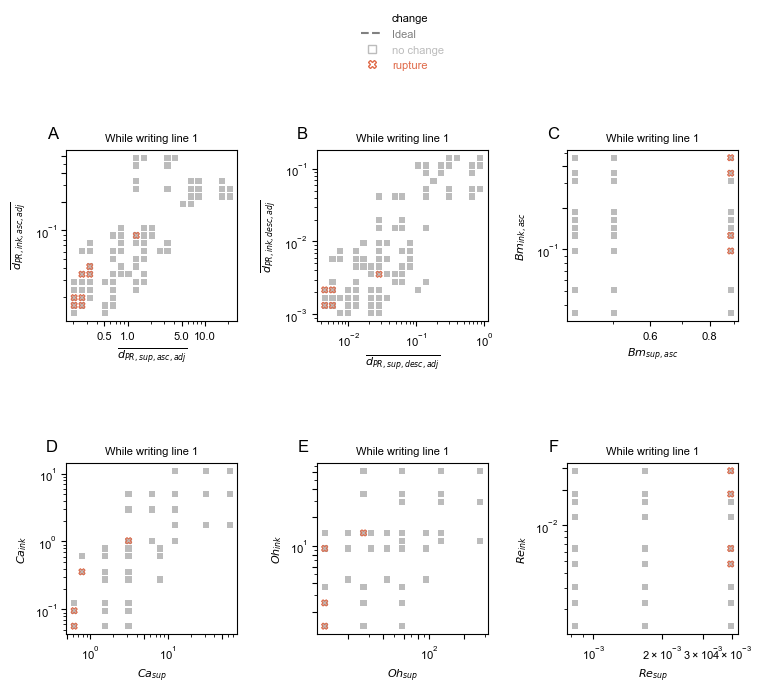

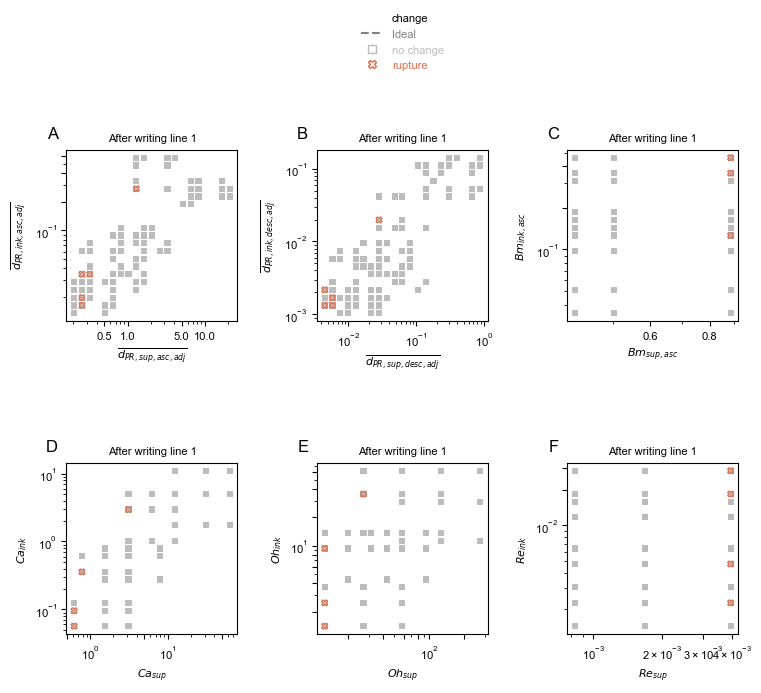

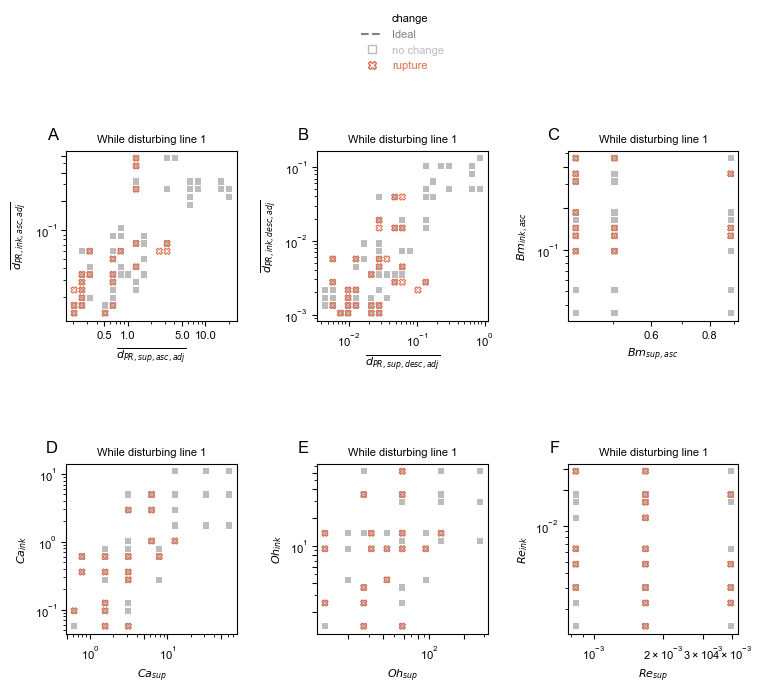

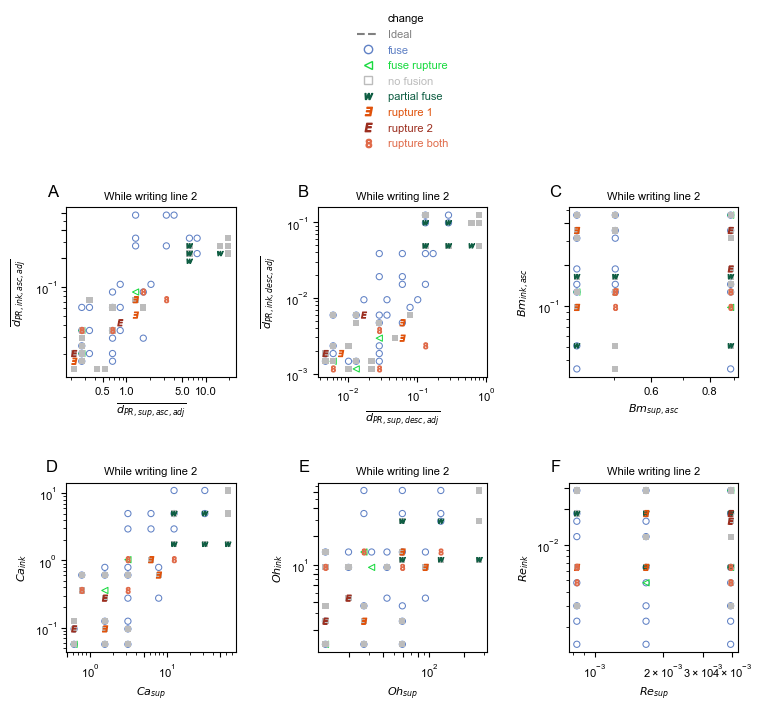

In [9]:
for cvar in ['l1w1', 'l1w1relax', 'l1d1', 'l1w2']:
    sl1 = ['dnorma_adj', 'dnormd_adj', 'Bma']
    sl2 = ['Ca', 'Oh', 'Re']
    if cvar=='l1w2':
        ssi = ms.ss[ms.ss.spacing==0.5]
    else:
        ssi = ms.ss
    qsd1 = mp.qualityScatterXY(ms, ssi
                               , [[f'sup_{s}' for s in sl] for sl in [sl1, sl2]]
                               , [[f'ink_{s}' for s in sl] for sl in [sl1, sl2]]
                               , cvar=cvar, simplify=False
                               , logx=True, logy=True, plotType='paper', figsize=(7.5, 7))
    qsd1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', f'{cvar}_vert_xvars'))

In [8]:
ms.depCorrelations(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'vertSDTCorrs.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\vertSDTCorrs.csv


In [29]:
ms.addDnormAdj('sup', 'd')

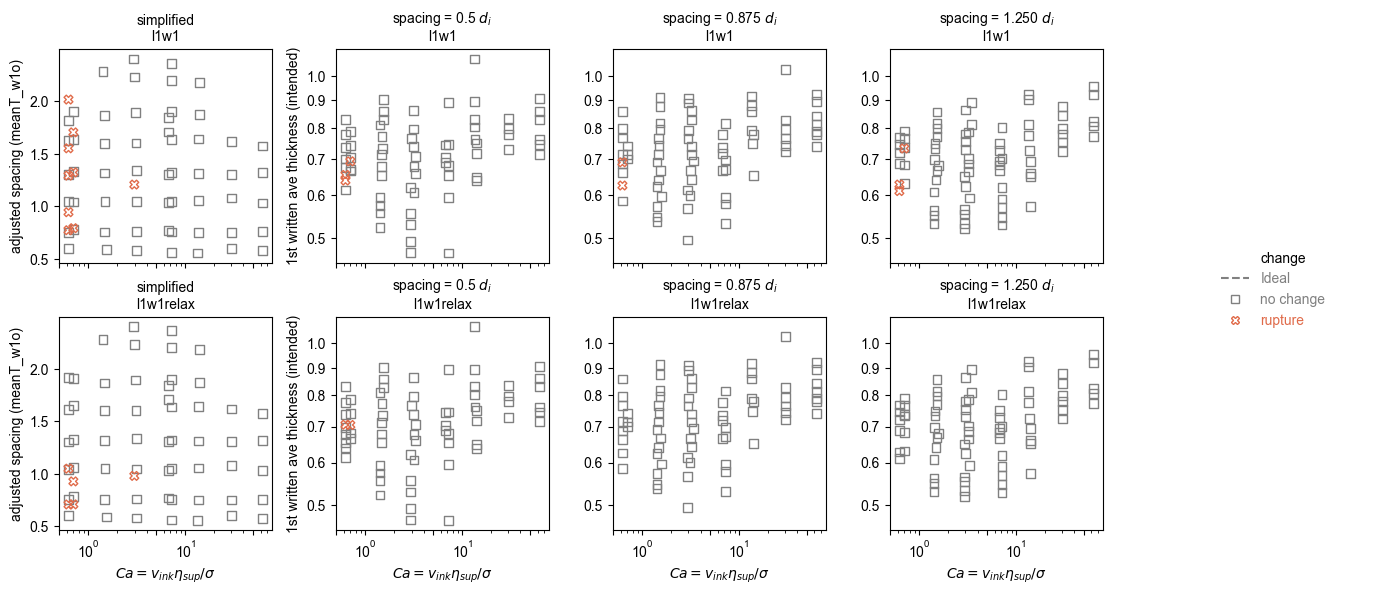

In [11]:
cvlw1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='int_Ca', yvar='meanT_w1o', cvar0='l1w1', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

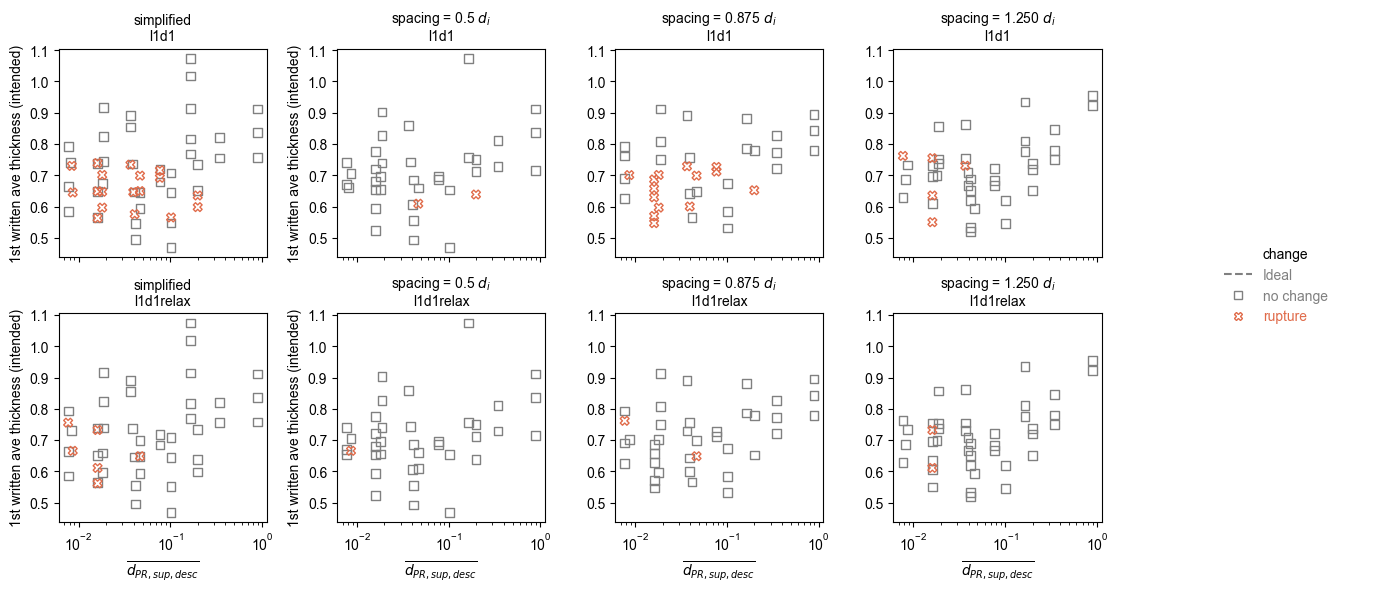

In [15]:
cvlw1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', y0var='meanT_w1o', cvar0='l1d1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1w1_vert.png and .svg


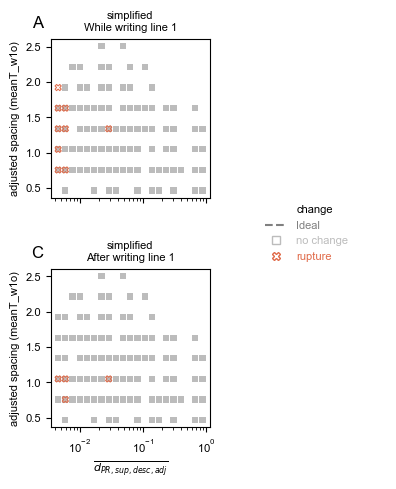

In [58]:
qsw1 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', '', y0var='spacing_adj', cvar0='l1w1'
                               , simplify=True, logx=True, plotType='paper', figsize=(4,5))
qsw1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w1_vert'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1d1_vert.png and .svg


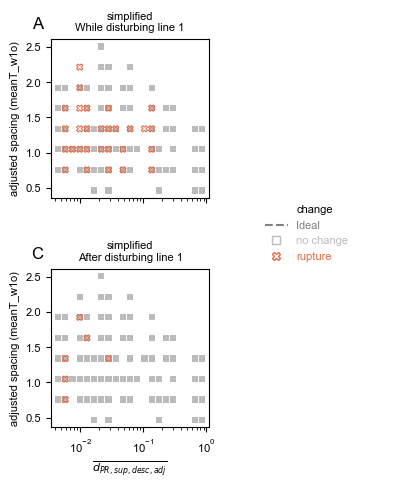

In [57]:
qsd1 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1d1'
                               , simplify=True, logx=True, plotType='paper', figsize=(4,5))
qsd1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d1_vert'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1w2_vert.png and .svg


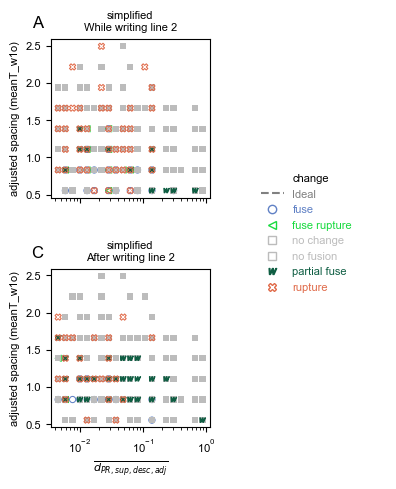

In [53]:
qsw2 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1w2'
                               , simplify=False, logx=True, plotType='paper', figsize=(4,5))
qsw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_vert'))

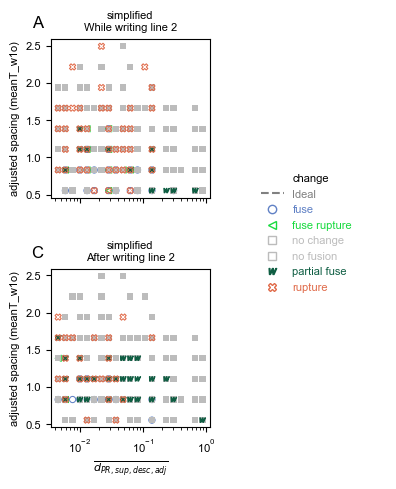

In [55]:
qsw2 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1w2', simplify=False
                               , logx=True, rigid=True, dx=0.05, dy=0.05, plotType='paper', figsize=(4,5))
#qsw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_vert'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1w2_vert_05.png and .svg


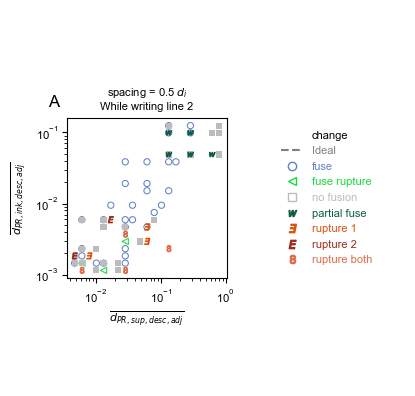

In [59]:
qsw205 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'ink_dnormd_adj', cvar0='l1w2', relax=False, spacing=0.5,
                                 dx=0.05, dy=0.05, rigid=True, simplify=True, logx=True, logy=True, plotType='paper', figsize=(4.2,4))
qsw205.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_vert_05'))

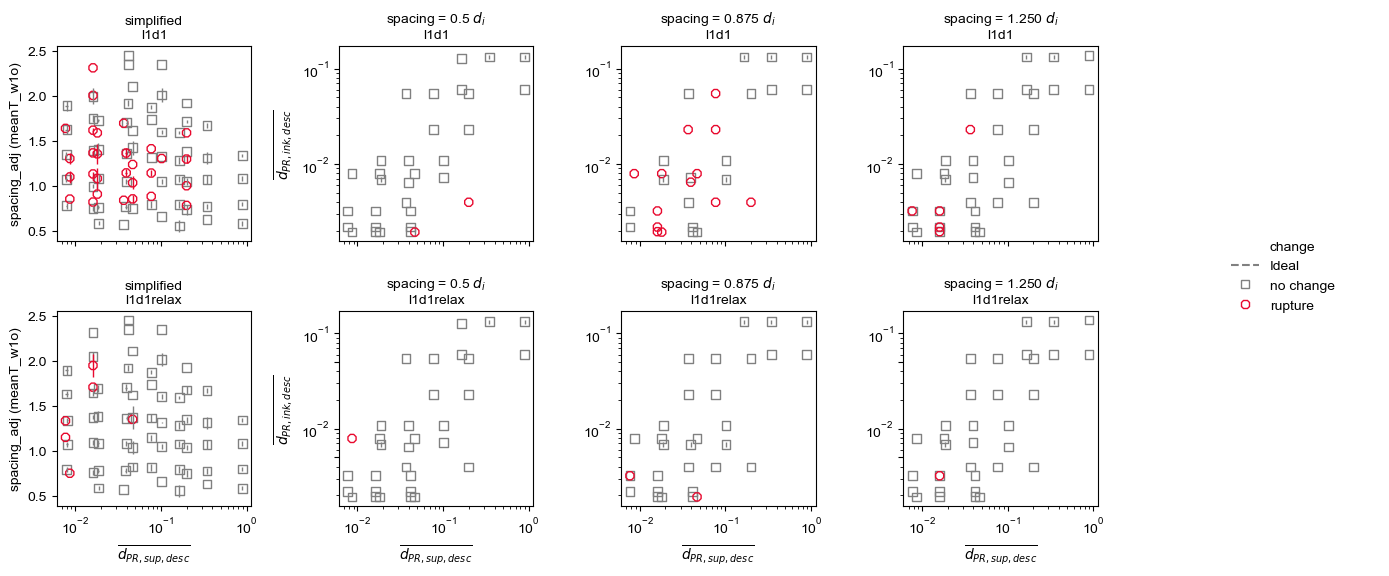

In [165]:
cvld1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1d1', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

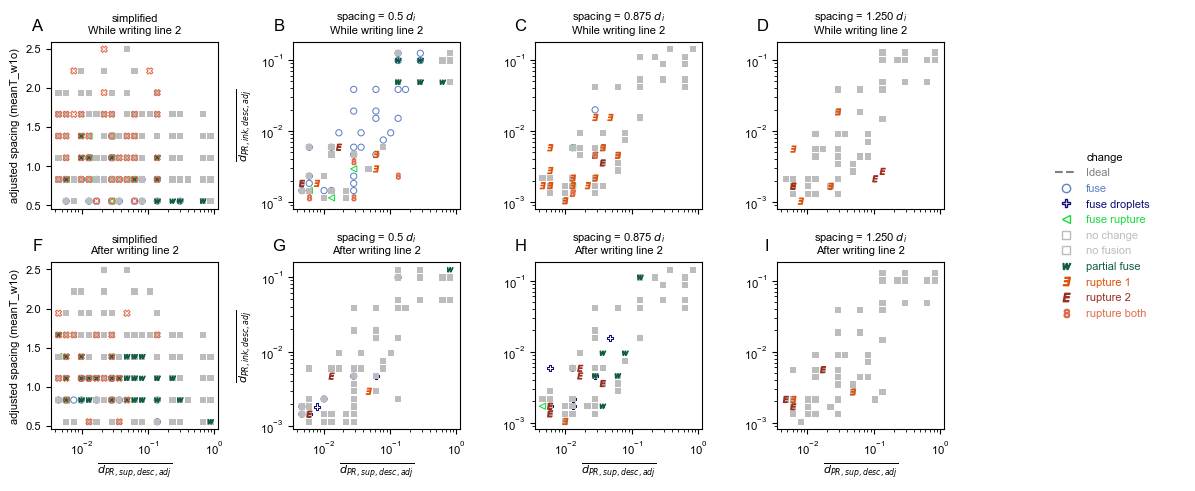

In [71]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w2'
                            , dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

In [72]:
cvlw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_vert_spacing'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\quality\l1w2_vert_spacing.png and .svg


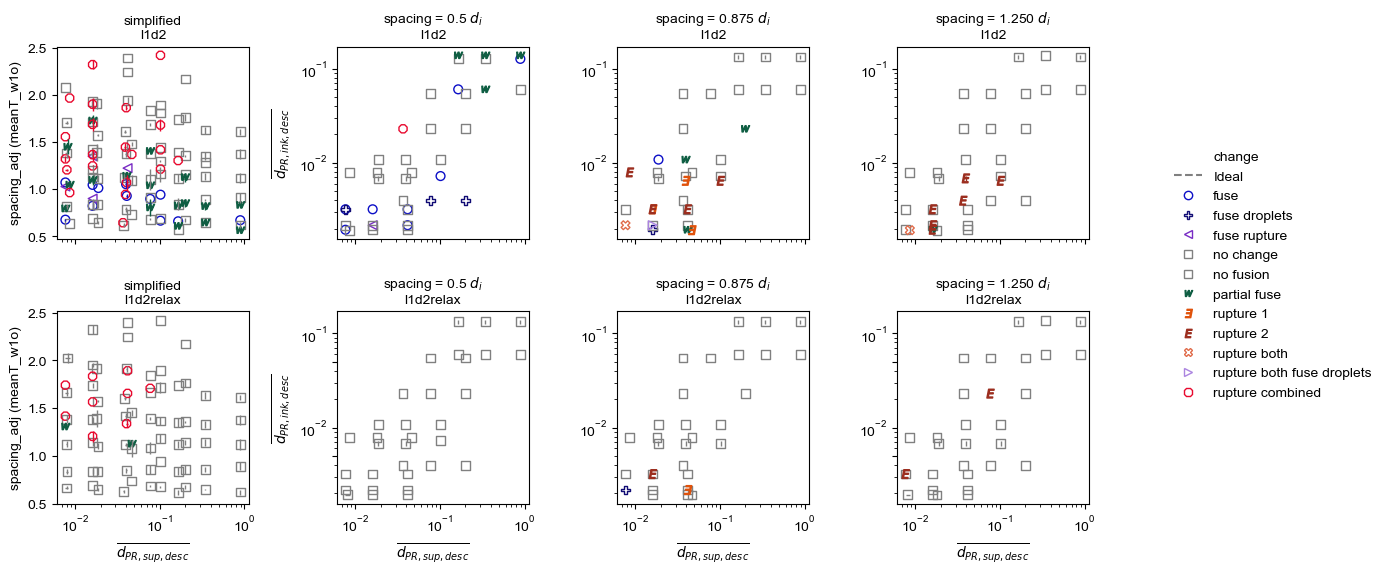

In [16]:
cvld2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1d2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

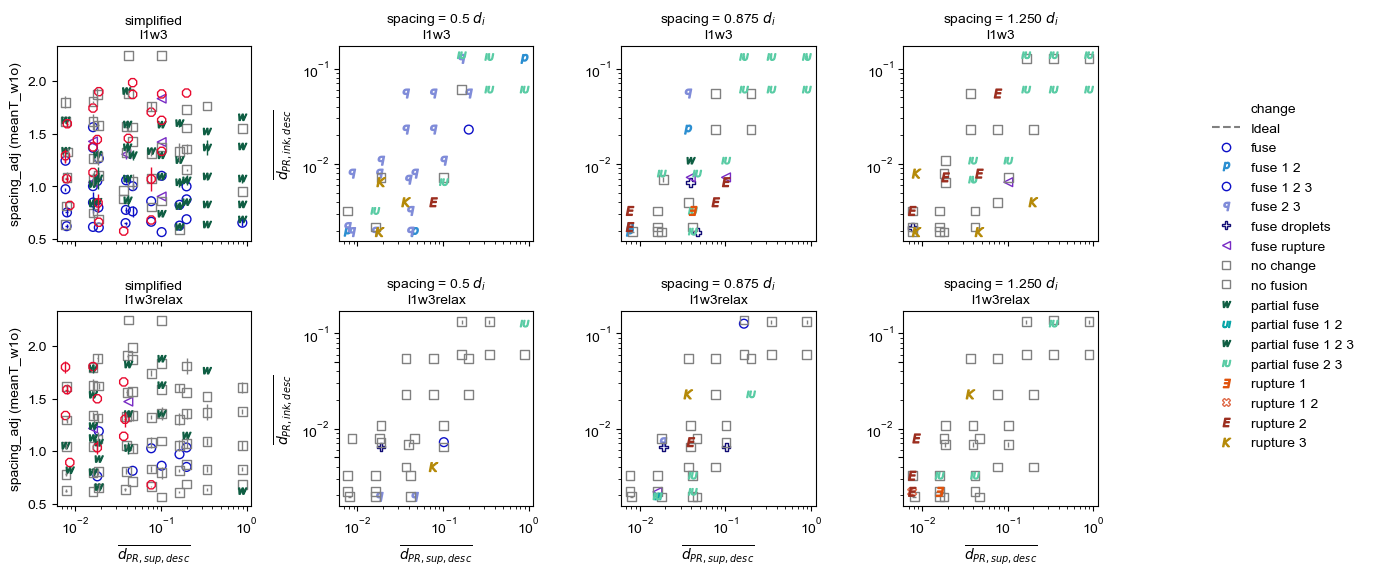

In [17]:
cvlw3 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w3', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

In [7]:
ms.openFolder(576)

In [6]:
ms.ss[(ms.ss.l1w2=='no fusion')&(ms.ss.l1w2relax=='no change')&(ms.ss.meanT_w1o>0.8)&(ms.ss.hn_w2o>0.9)]

printFolderR  sup_Ca  ink_Ca  \
121  SDT\PDMSS_S85-0.05\I_PDMSS10-S85-0.05_S_3.00\I...    2.98    5.53   
428  SDT\SO\I_SO11_S_3.50\I_SO11_S_3.50_230727\dist...    1.42    0.14   
574  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_3.00\I_SO6-S20-...   13.37    1.89   
575  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_3.00\I_SO6-S20-...   13.37    1.89   
576  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_3.00\I_SO6-S20-...   13.37    1.89   
577  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_3.00\I_SO6-S20-...   13.37    1.89   
578  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_3.00\I_SO6-S20-...   13.37    1.89   
579  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_3.00\I_SO6-S20-...   13.37    1.89   
593  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_3.50\I_SO6-S20-...   30.35    1.89   
597  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_3.50\I_SO6-S20-...   30.35    1.89   
604  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_4.00\I_SO6-S20-...   62.72    1.89   
609  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_4.00\I_SO6-S20-...   62.72    1.89   
611  SDT\SO_S20-0.5\I_SO6-S20-0.5_S_4.00\I_SO6-S20-...   62.72    1.89   
622  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-...   13.37    5.13   
632  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.00\I_SO7-S20-...   13.37    5.13   
648  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.50\I_SO7-S20-...   30.35    5.13   
649  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.50\I_SO7-S20-...   30.35    5.13   
650  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.50\I_SO7-S20-...   30.35    5.13   
651  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_3.50\I_SO7-S20-...   30.35    5.13   
659  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
660  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
661  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
662  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
663  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
665  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
666  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
667  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
668  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
669  SDT\SO_S20-0.5\I_SO7-S20-0.5_S_4.00\I_SO7-S20-...   62.72    5.13   
696  SDT\SO_S20-0.5\I_SO8-S20-0.5_S_3.50\I_SO8-S20-...   30.35   11.00   
715  SDT\SO_S20-0.5\I_SO8-S20-0.5_S_4.00\I_SO8-S20-...   62.72   11.00   
718  SDT\SO_S20-0.5\I_SO8-S20-0.5_S_4.00\I_SO8-S20-...   62.72   11.00   
720  SDT\SO_S20-0.5\I_SO8-S20-0.5_S_4.00\I_SO8-S20-...   62.72   11.00   
733  SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.00\I_SO10-...    1.53    0.88   
752  SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.50\I_SO10-...    3.47    0.88   
753  SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.50\I_SO10-...    3.47    0.88   
758  SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.50\I_SO10-...    3.47    0.88   
759  SDT\SO_S85-0.05\I_SO10-S85-0.05_S_3.50\I_SO10-...    3.47    0.88   
777  SDT\SO_S85-0.05\I_SO10-S85-0.05_S_4.00\I_SO10-...    7.17    0.88   

     sup_dnorma  sup_dnormd  ink_dnorma  ink_dnormd    sup_We    ink_We  \
121        1.76        0.04        0.72    5.48e-02  1.18e-02  7.93e-03   
428        0.39        0.02        0.05    1.95e-03  2.40e-03  1.61e-03   
574        7.88        0.16        0.31    6.01e-02  5.29e-02  3.35e-02   
575        7.88        0.16        0.31    6.01e-02  5.29e-02  3.35e-02   
576        7.88        0.16        0.31    6.01e-02  5.29e-02  3.35e-02   
577        7.88        0.16        0.31    6.01e-02  5.29e-02  3.35e-02   
578        7.88        0.16        0.31    6.01e-02  5.29e-02  3.35e-02   
579        7.88        0.16        0.31    6.01e-02  5.29e-02  3.35e-02   
593        8.39        0.35        0.31    6.01e-02  5.14e-02  3.35e-02   
597        8.39        0.35        0.31    6.01e-02  5.14e-02  3.35e-02   
604       21.19        0.89        0.31    6.01e-02  5.24e-02  3.35e-02   
609       21.19        0.89        0.31    6.01e-02  5.24e-02  3.35e-02   
611       21.19        0.89        0.31    6.01e-02  5.24e-02  3.35e-02   
622        7.88        0.16    

In [171]:
ms.depCorrelations(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'VertSDTCorrs.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\VertSDTCorrs.csv


In [88]:
ms.depCor

spearman_corr  spearman_p                    var1                  var2
0               0.45    3.20e-46                  x0_w1p           dxprint_w1p
1              -0.22    6.30e-11                  x0_w1p          segments_w1p
2              -0.37    8.35e-30                  x0_w1p                 w_w1o
3               0.30    1.15e-19                  x0_w1p                 h_w1o
4               0.29    4.88e-19                  x0_w1p                hn_w1o
...              ...         ...                     ...                   ...
20890           0.12    4.43e-02  delta_emptiness_write3   delta_stdevT_write3
20891           0.37    3.96e-11  delta_emptiness_write3  delta_minmaxT_write3
20892          -0.39    1.38e-12      delta_meanT_write3   delta_stdevT_write3
20893          -0.19    1.13e-03      delta_meanT_write3  delta_minmaxT_write3
20894           0.65    8.61e-37     delta_stdevT_write3  delta_minmaxT_write3

[20895 rows x 4 columns]

{'spearman_corr': -0.2370441156237316,
 'spearman_p': 3.459824897509583e-05,
 'var1': 'dx0_w3p',
 'var2': 'delta_x0_write3'}

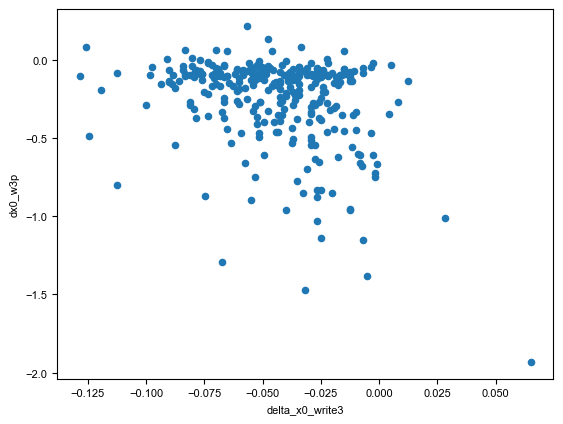

In [172]:
ms.depCorrelation('delta_x0_write3', 'dx0_w3p', plot=True)

In [6]:
ms.depCor[ms.depCor.spearman_corr>0.9]

spearman_corr  spearman_p              var1               var2
9925            0.92   4.62e-122  delta_w_disturb1  delta_xf_disturb1
11832           0.97    0.00e+00       space_a_w2p       space_at_w2p
12489           0.92   8.93e-239             w_w2o             xf_w2o
14024           0.94   1.41e-274          dwdt_w2o          dxfdt_w2o
15616           0.94   1.53e-139       space_a_d2p       space_at_d2p
17004           0.95   8.73e-156        stdevT_d2o        minmaxT_d2o
19178           0.98   9.03e-209  delta_w_disturb2  delta_xf_disturb2
19962           0.95   5.83e-151       space_a_w3p       space_at_w3p
20485           0.92   2.66e-121        stdevT_w3o        minmaxT_w3o
20565           0.93   1.91e-135          dwdt_w3o          dxfdt_w3o

In [92]:
ms.openFolder(101)

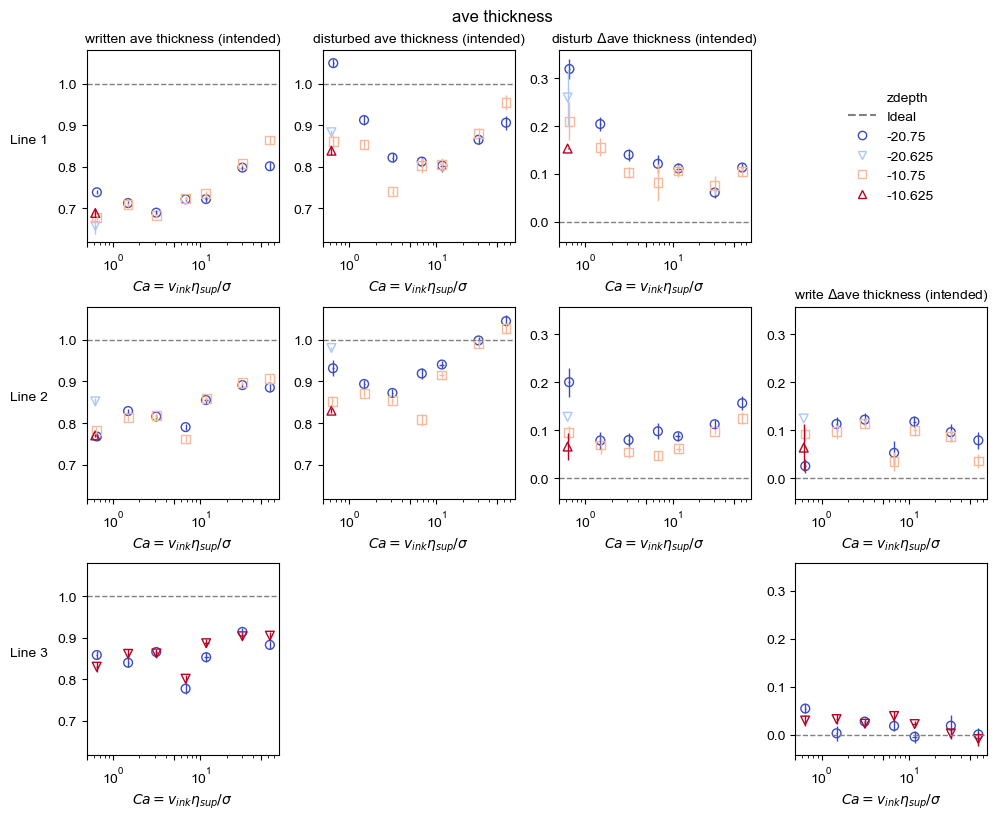

In [226]:
yvl = mp.yvarlines(ms, ms.ss[ms.ss.spacing==0.5], xvar='int_Ca', yvar='meanT', cvar='zdepth', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

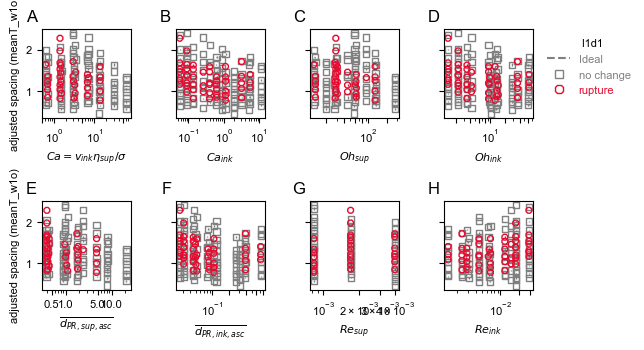

In [33]:
xvl = mp.xvarlines(ms, ms.ss, xvarList=['int_Ca', 'ink_Ca','sup_Oh', 'ink_Oh', 'sup_dnorma', 'ink_dnorma', 'sup_Re', 'ink_Re']
                   , cvar='l1d1', yvar='spacing_adj'
                   , logx=True, logy=False, mode='scatter', dx=0.05, dy=0.05, plotType='paper')
xvl.fig

rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets
rupture 1 fuse droplets


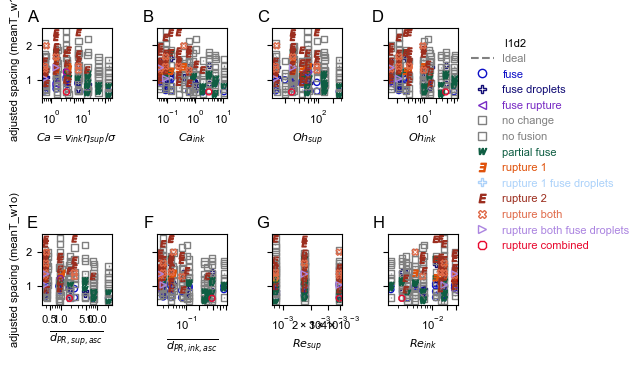

In [34]:
xvl = mp.xvarlines(ms, ms.ss, xvarList=['int_Ca', 'ink_Ca','sup_Oh', 'ink_Oh', 'sup_dnorma', 'ink_dnorma', 'sup_Re', 'ink_Re']
                   , cvar='l1d2', yvar='spacing_adj'
                   , logx=True, logy=False, mode='scatter', dx=0.05, dy=0.05, plotType='paper')
xvl.fig

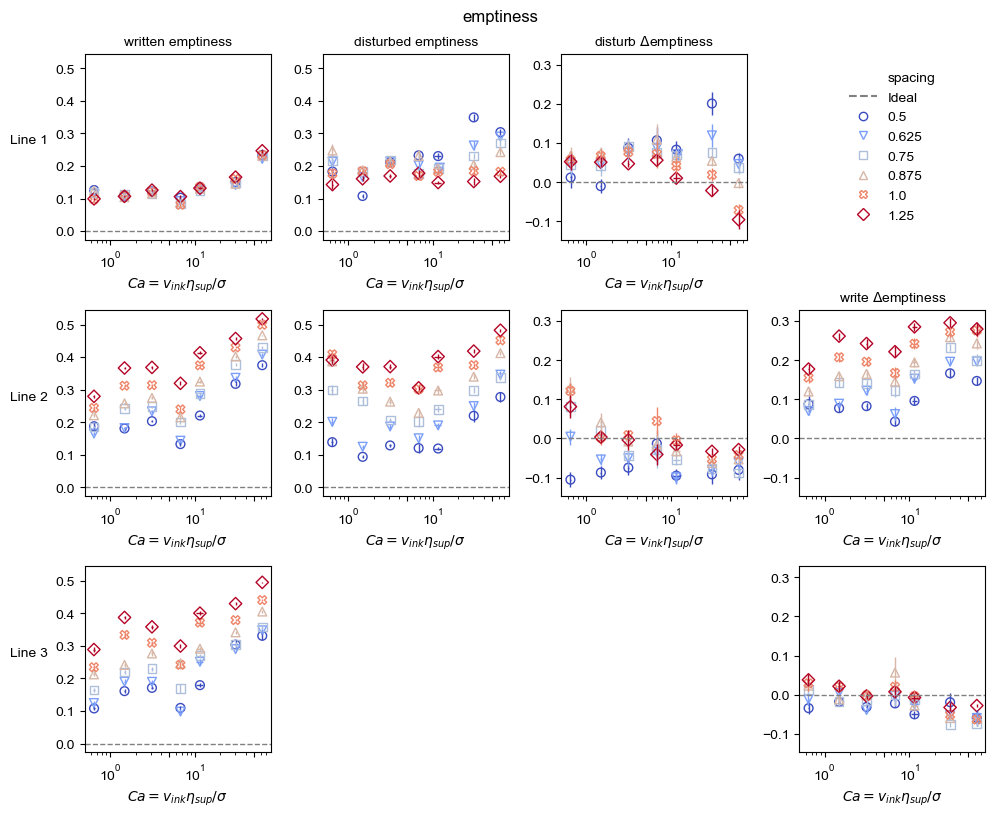

In [207]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='emptiness', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

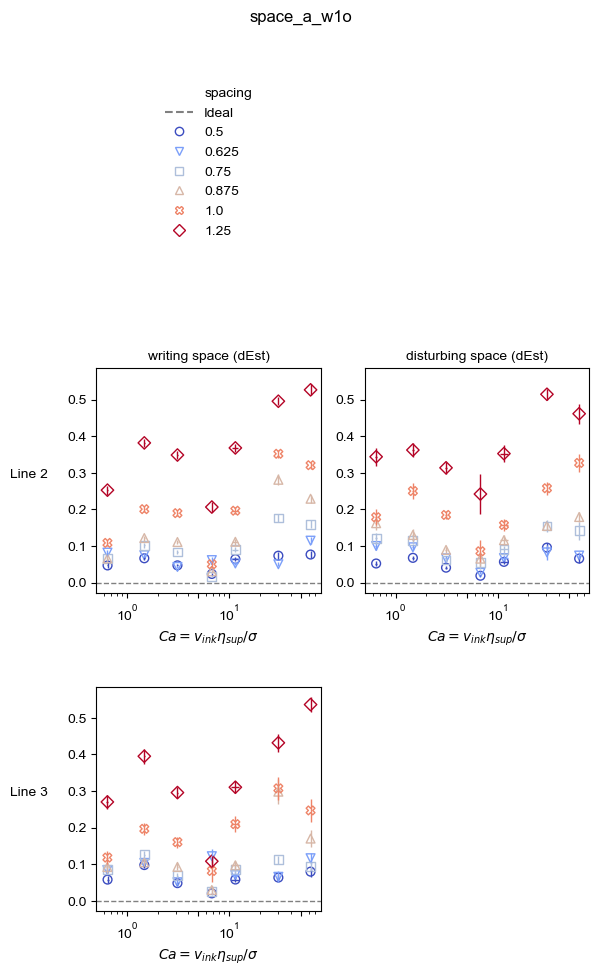

In [206]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='space_a', cvar='spacing', llist=[1,2, 3]
             , plist=['wp', 'dp'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [208]:
ms.reduceRows('delta_emptiness_disturb1', yvarmax=-0.1)

ink_shortname  sup_shortname  int_Ca  spacing  delta_emptiness_disturb1
343           SO10            3.5    1.42     0.75                     -0.21
724  SO10-S85-0.05            3.0    1.53     0.50                     -0.19
743  SO10-S85-0.05            3.5    3.47     0.62                     -0.16
603    SO6-S20-0.5            4.0   62.72     1.25                     -0.15
744  SO10-S85-0.05            3.5    3.47     0.75                     -0.15
726  SO10-S85-0.05            3.0    1.53     0.75                     -0.13
657    SO7-S20-0.5            4.0   62.72     1.25                     -0.13
764  SO10-S85-0.05            4.0    7.17     1.00                     -0.12
342           SO10            3.5    1.42     0.62                     -0.12
602    SO6-S20-0.5            4.0   62.72     1.00                     -0.12
742  SO10-S85-0.05            3.5    3.47     0.50                     -0.11
341           SO10            3.5    1.42     0.50                     -0.11
725  SO10-S85-0.05            3.0    1.53     0.62                     -0.11
765  SO10-S85-0.05            4.0    7.17     1.25                     -0.11
760  SO10-S85-0.05            4.0    7.17     0.50                     -0.11

In [209]:
ms.openFolder(603)

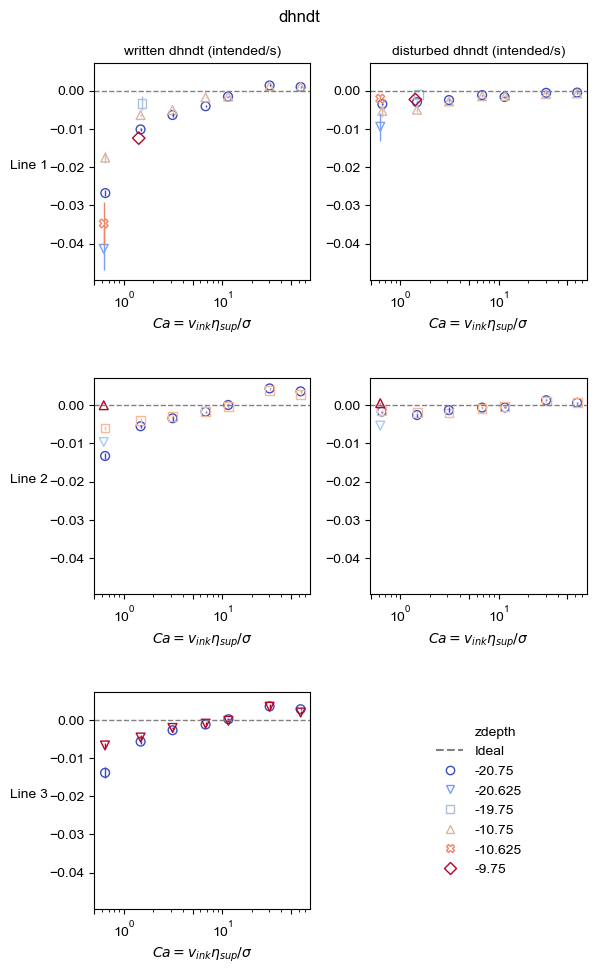

In [211]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='dhndt', cvar='zdepth', llist=[1, 2, 3]
             , plist=['wo', 'do'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

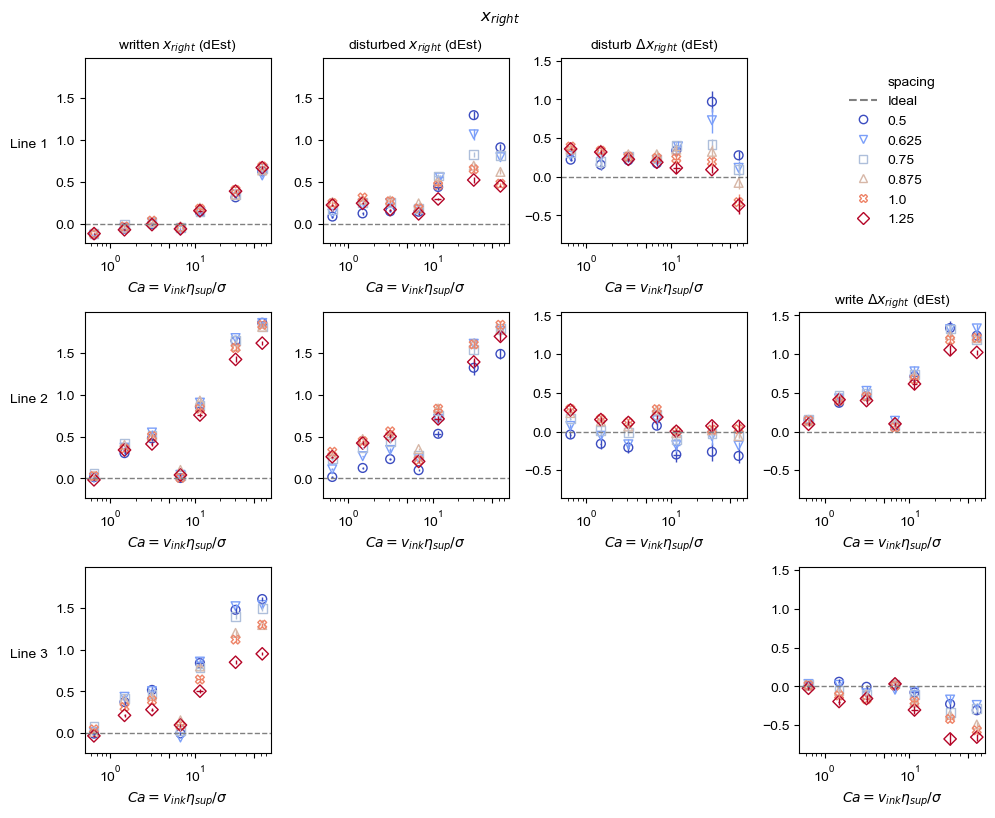

In [36]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='xf', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

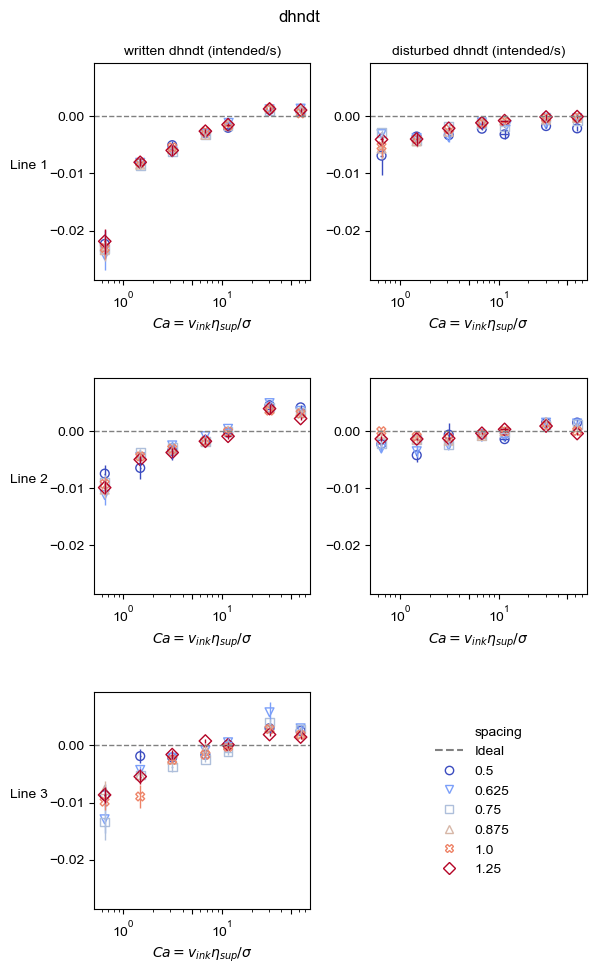

In [18]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='dhndt', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

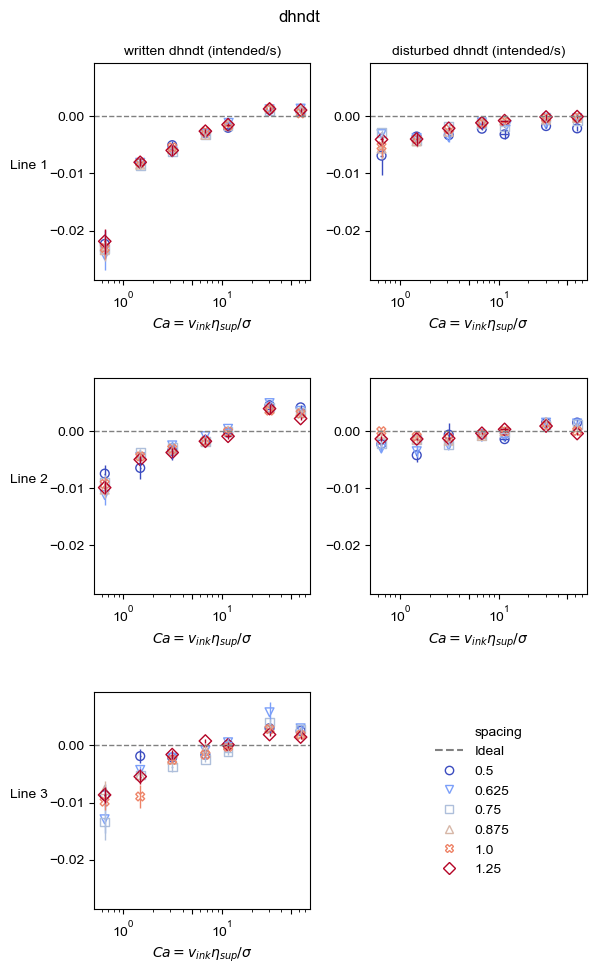

In [18]:
yvl = mp.yvarlines(ms, ms.ss, xvar='int_Ca', yvar='dhndt', cvar='spacing', llist=[1, 2, 3]
             , plist=['wo', 'do'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [4]:
rr = ms.reduceRows('delta_hn_disturb1', yvarmax=-0.3)

C:\Users\lmf1\Miniconda3\lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


ink_shortname  sup_shortname  int_Ca  spacing  delta_hn_disturb1
0            PDMSS10            3.0    0.70     0.50              -0.54
270             SO10            3.0    0.62     0.62              -0.49
2            PDMSS10            3.0    0.70     0.75              -0.48
219  PDMSS8-S85-0.05            3.0    2.98     1.00              -0.47
490              SO9            3.5    1.42     0.50              -0.47
56         PDMSS12.5            3.0    0.70     0.75              -0.47
269             SO10            3.0    0.62     0.50              -0.46
1            PDMSS10            3.0    0.70     0.62              -0.46
58         PDMSS12.5            3.0    0.70     1.00              -0.45
217  PDMSS8-S85-0.05            3.0    2.98     0.75              -0.44
57         PDMSS12.5            3.0    0.70     0.88              -0.44
19           PDMSS10            3.5    1.59     0.62              -0.44
20           PDMSS10            3.5    1.59     0.75              -0.43
492              SO9            3.5    1.42     0.75              -0.43
456              SO9            3.0    0.62     0.75              -0.42
218  PDMSS8-S85-0.05            3.0    2.98     0.88              -0.42
457              SO9            3.0    0.62     0.88              -0.41
493              SO9            3.5    1.42     0.88              -0.40
220  PDMSS8-S85-0.05            3.0    2.98     1.25              -0.40
491              SO9            3.5    1.42     0.62              -0.40
55         PDMSS12.5            3.0    0.70     0.62              -0.40
22           PDMSS10            3.5    1.59     1.00              -0.39
216  PDMSS8-S85-0.05            3.0    2.98     0.62              -0.37
459              SO9            3.0    0.62     1.25              -0.37
455              SO9            3.0    0.62     0.62              -0.37
458              SO9            3.0    0.62     1.00              -0.37
3            PDMSS10            3.0    0.70     0.88              -0.36
472              SO9            3.0    0.62     0.50              -0.36
778     SO8-S85-0.05            3.0    1.53     0.50              -0.36
4            PDMSS10            3.0    0.70     1.00              -0.35
21           PDMSS10            3.5    1.59     0.88              -0.35
18           PDMSS10            3.5    1.59     0.50              -0.35
5            PDMSS10            3.0    0.70     1.25              -0.34
305             SO10            3.5    1.42     0.50              -0.34
781     SO8-S85-0.05            3.0    1.53     0.88              -0.34
780     SO8-S85-0.05            3.0    1.53     0.75              -0.34
494              SO9            3.5    1.42     1.00              -0.34
307             SO10            3.5    1.42     0.75              -0.33
779     SO8-S85-0.05            3.0    1.53     0.62              -0.33
37           PDMSS10            4.0    3.29     0.62              -0.33
527              SO9            4.0    2.93     0.62              -0.33
782     SO8-S85-0.05            3.0    1.53     1.00              -0.33
473              SO9            3.0    0.62     0.62              -0.32
474              SO9            3.0    0.62     0.75              -0.32
402             SO11            3.5    1.42     0.75              -0.32
59         PDMSS12.5            3.0    0.70     1.25              -0.31
526              SO9            4.0    2.93     0.50              -0.30
783     SO8-S85-0.05            3.0    1.53     1.25              -0.30

In [7]:
ms.openFolder(474)

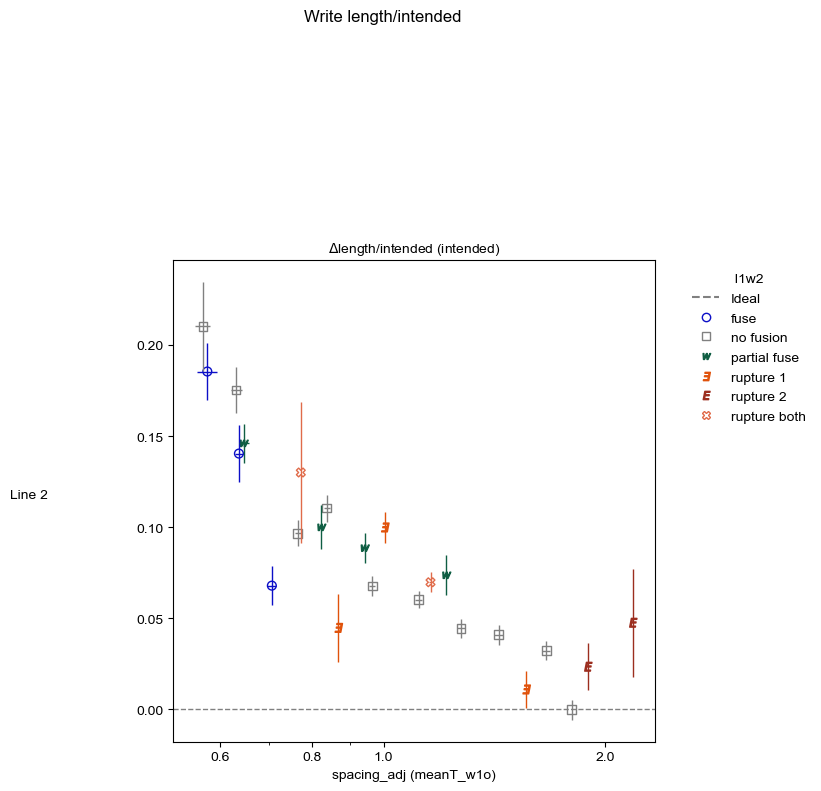

In [9]:
yvl = mp.yvarlines(ms, ms.ss[ms.ss.int_Ca>10], xvar='spacing_adj', yvar='hn',cvar='l1w2',  llist=[2]
             , plist=['write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.1)
yvl.fig

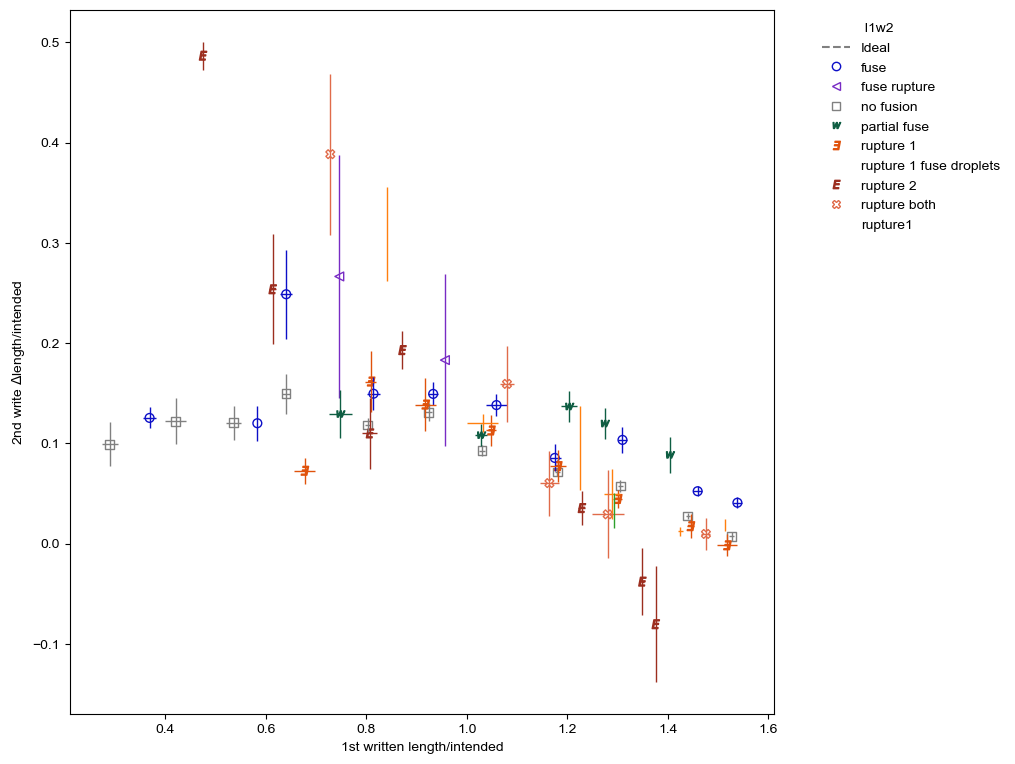

In [10]:
yvl = mp.scatterPlot(ms, ms.ss, xvar='hn_w1o', yvar='delta_hn_write2',cvar='l1w2', plotType='notebook', yideal=me.ideals()
                   , logx=False, logy=False, mode='scatter', dx=0.1)
yvl.fig

# export plots

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\shrinkage_V.png and .svg


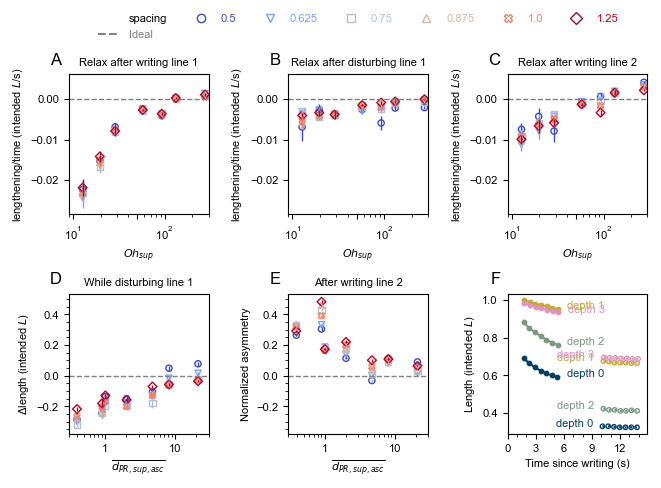

In [4]:
yvl = mp.shrinkagePlot(ms, r'SDT\SO\I_SO9_S_3.00\I_SO9_S_3.00_230721\disturbVert2_1_0.750', export=True)
yvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\shift_V.png and .svg


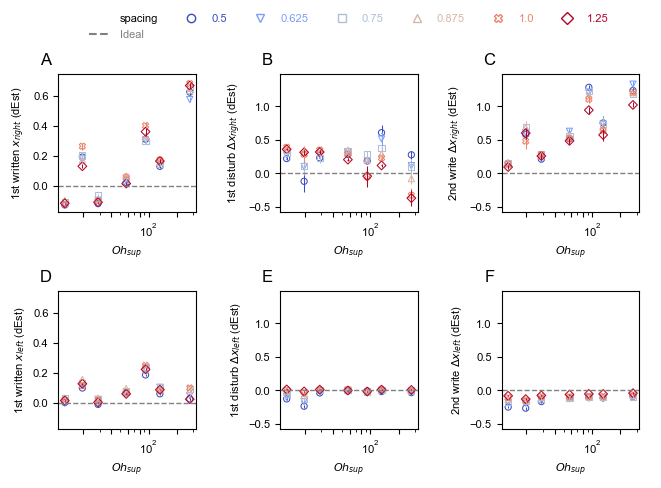

In [82]:
yvl = mp.shiftPlot(ms, 'V', 'sup_Oh', export=True)
yvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\fusion_V.png and .svg


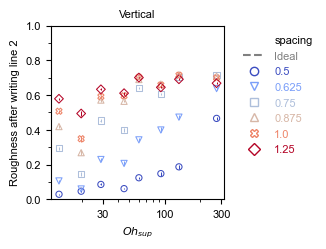

In [7]:
mp.fusionPlot(ms, 'V', export=True).fig

# export regressions

In [13]:
def exportRegression(var, **kwargs) -> None:
    mp.regressionTableSDT(ms, ms.ss, var, logy=False, printOut=False,  package='tabularShort', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, tag='V', exportFolder=os.path.join(cfg.path.fig, 'SDT')
                         , **kwargs)

In [29]:
# shrinkage
exportRegression('dhndt_w1o')
exportRegression('delta_hn_disturb1', Camax=1)
exportRegression('delta_hn_disturb1')
exportRegression('dhndt_d1o')
exportRegression('delta_hn_write2')
exportRegression('delta_hn_write2', Camin=50)
exportRegression('delta_hn_disturb2')
exportRegression('delta_hn_write3', Camin=50)
exportRegression('delta_hn_write3')
exportRegression('ldiff_w2o')
exportRegression('ldiff_w3o')

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_dhndt_w1o_V_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_dhndt_w1o_V_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_delta_hn_disturb1_V_Camax1_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_delta_hn_disturb1_V_Camax1_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_delta_hn_disturb1_V_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_delta_hn_disturb1_V_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_dhndt_d1o_V_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_dhndt_d1o_V_Reg.png and .svg
INFO: Exported

In [30]:
# shifting
exportRegression('delta_x0_disturb1')
exportRegression('delta_x0_disturb1', spacing=1.25)
exportRegression('delta_x0_disturb1', Camax=1)
exportRegression('delta_x0_write2')
exportRegression('delta_x0_write2', Camax=1)
exportRegression('delta_x0_write2', spacing=0.5)
exportRegression('delta_x0_write2', spacing=1.25)
exportRegression('delta_x0_disturb2')
exportRegression('delta_x0_write3')

exportRegression('delta_xf_disturb1')
exportRegression('delta_xf_disturb2')


INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_delta_x0_disturb1_V_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_delta_x0_disturb1_V_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_delta_x0_disturb1_V_1250_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_delta_x0_disturb1_V_1250_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_delta_x0_disturb1_V_Camax1_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_delta_x0_disturb1_V_Camax1_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_delta_x0_write2_V_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_delta_x0_wr

In [31]:
# shifting
exportRegression('roughness_w2o')
exportRegression('roughness_w2o', spacing=0.875)

exportRegression('emptiness_w2o')
exportRegression('emptiness_w2o', spacing=0.875)
exportRegression('emptiness_w2o', Camax=1)

exportRegression('segments_w2o')

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_roughness_w2o_V_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_roughness_w2o_V_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_roughness_w2o_V_875_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_roughness_w2o_V_875_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_emptiness_w2o_V_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_emptiness_w2o_V_Reg.png and .svg
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\tab_emptiness_w2o_V_875_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\regression\fig_emptiness_w2o_V_875_Reg.png and .svg
INFO: Export

## hn

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_hn_disturb1RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_hn_disturb1Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_hn_disturb1Reg.png and .svg


variable Spearman coeff  \
0                                             spacing           0.04   
1                                    adjusted spacing          -0.15   
2                               $Gta_{ink}/Gta_{sup}$          -0.03   
3                               $tGd_{ink}/tGd_{sup}$           0.01   
4                                 $Ga_{ink}/Ga_{sup}$          -0.04   
5                                 $Gd_{ink}/Gd_{sup}$          -0.07   
6                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.42   
7               $\tau_{y.ink.desc}/\tau_{y.sup.desc}$          -0.03   
8                                           $\bm{Ca}$    $\bm{0.70}$   
9                                          $Ca_{ink}$           0.53   
10                                    $\bm{Ca_{sup}}$    $\bm{0.70}$   
11                     $\bm{Ca_{ink}\times Ca_{sup}}$    $\bm{0.63}$   
12                                $Ca_{ink}/Ca_{sup}$          -0.06   
13                        $\overline{d_{PR.ink.asc}}$           0.49   
14                   $\bm{\overline{d_{PR.sup.asc}}}$    $\bm{0.70}$   
15  $\bm{\overline{d_{PR.ink.asc}}\times \overline...    $\bm{0.67}$   
16  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.42   
17                       $\overline{d_{PR.ink.desc}}$           0.61   
18                  $\bm{\overline{d_{PR.sup.desc}}}$    $\bm{0.73}$   
19  $\bm{\overline{d_{PR.ink.desc}}\times \overlin...    $\bm{0.71}$   
20  $\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...          -0.03   
21                                    $\bm{We_{ink}}$    $\bm{0.53}$   
22                                    $\bm{We_{sup}}$    $\bm{0.52}$   
23                     $\bm{We_{ink}\times We_{sup}}$    $\bm{0.52}$   
24                                $We_{ink}/We_{sup}$          -0.15   
25                                         $Oh_{ink}$           0.43   
26                                    $\bm{Oh_{sup}}$    $\bm{0.65}$   
27                     $\bm{Oh_{ink}\times Oh_{sup}}$    $\bm{0.61}$   
28                                $Oh_{ink}/Oh_{sup}$          -0.06   
29                                         $Re_{ink}$          -0.13   
30                                         $Re_{sup}$          -0.34   
31                          $Re_{ink}\times Re_{sup}$          -0.29   
32                                $Re_{ink}/Re_{sup}$           0.06   
33                                     $Bm_{ink.asc}$          -0.38   
34                                     $Bm_{sup.asc}$          -0.09   
35                  $Bm_{ink.asc}\times Bm_{sup.asc}$          -0.42   
36                        $Bm_{ink.asc}/Bm_{sup.asc}$          -0.29   
37                                    $Bm_{ink.desc}$          -0.03   
38                                    $Bm_{sup.desc}$           0.23   
39                $Bm_{ink.desc}\times Bm_{sup.desc}$           0.06   
40                      $Bm_{ink.desc}/Bm_{sup.desc}$          -0.03   
41                                       $\eta_{ink}$           0.13   
42                                       $\eta_{sup}$           0.34   
43                      $\eta_{ink}\times \eta_{sup}$           0.29   
44                            $\eta_{ink}/\eta_{sup}$          -0.06   

        Spearman p  
0          5.3e-01  
1          1.0e-02  
2          5.9e-01  
3          9.0e-01  
4          5.3e-01  
5          2.6e-01  
6          4.1e-14  
7          6.1e-01  
8   $\bm{4.0e-44}$  
9          2.0e-22  
10  $\bm{4.0e-44}$  
11  $\bm{4.6e-34}$  
12         2.7e-01  
13         6.3e-19  
14  $\bm{8.0e-44}$  
15  $\bm{2.5e-39}$  
16         4.1e-14  
17         2.7e-31  
18  $\bm{5.5e-49}$  
19  $\bm{2.3e-45}$  
20         6.1e-01  
21  $\bm{6.0e-23}$  
22  $\bm{2.4e-21}$  
23  $\bm{5.0e-22}$  
24         1.1e-02  
25         2.4e-14  
26  $\bm{1.2e-36}$  
27  $\bm{3.6e-31}$  
28         2.8e-01  
29         2.7e-02  
30         2.0e-09  
31         3.5e-07  
32         3.0e-01  
33         3.0e-11

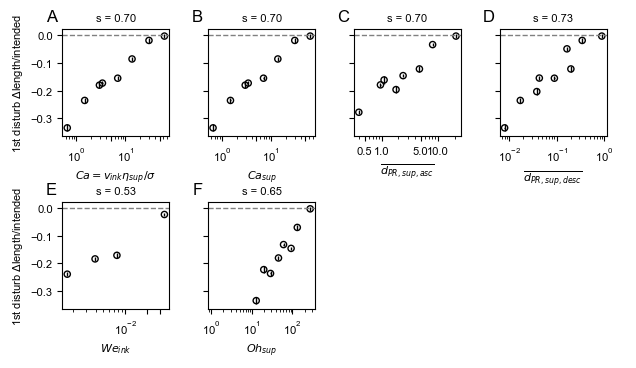

In [8]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_disturb1', logy=False, printOut=False,  package='pgfplot', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff  \
0                                             spacing           0.27   
1                                         spacing_adj           0.17   
2                               $Gta_{ink}/Gta_{sup}$           0.48   
3                               $tGd_{ink}/tGd_{sup}$           0.48   
4                                 $Ga_{ink}/Ga_{sup}$           0.48   
5                                 $Gd_{ink}/Gd_{sup}$           0.48   
6                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$           0.48   
7               $\tau_{y.ink.desc}/\tau_{y.sup.desc}$           0.48   
8                                          $Ca_{ink}$           0.48   
9                           $Ca_{ink}\times Ca_{sup}$           0.48   
10                                $Ca_{ink}/Ca_{sup}$           0.48   
11                        $\overline{d_{PR.ink.asc}}$           0.48   
12  $\overline{d_{PR.ink.asc}}\times \overline{d_{...           0.48   
13  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...           0.48   
14                       $\overline{d_{PR.ink.desc}}$           0.48   
15  $\overline{d_{PR.ink.desc}}\times \overline{d_...           0.48   
16  $\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...           0.48   
17                                         $We_{ink}$          -0.48   
18                          $We_{ink}\times We_{sup}$          -0.48   
19                                $We_{ink}/We_{sup}$          -0.48   
20                                         $Oh_{ink}$           0.48   
21                          $Oh_{ink}\times Oh_{sup}$           0.48   
22                                $Oh_{ink}/Oh_{sup}$           0.48   
23                                         $Re_{ink}$          -0.48   
24                          $Re_{ink}\times Re_{sup}$          -0.48   
25                                $Re_{ink}/Re_{sup}$          -0.48   
26                                     $Bm_{ink.asc}$          -0.48   
27                  $Bm_{ink.asc}\times Bm_{sup.asc}$          -0.48   
28                        $Bm_{ink.asc}/Bm_{sup.asc}$          -0.48   
29                                    $Bm_{ink.desc}$          -0.48   
30                $Bm_{ink.desc}\times Bm_{sup.desc}$          -0.48   
31                      $Bm_{ink.desc}/Bm_{sup.desc}$          -0.48   
32                                       $\eta_{ink}$           0.48   
33                      $\eta_{ink}\times \eta_{sup}$           0.48   
34                            $\eta_{ink}/\eta_{sup}$           0.48   

   Spearman p  
0     1.9e-01  
1     4.3e-01  
2     1.7e-02  
3     1.7e-02  
4     1.7e-02  
5     1.7e-02  
6     1.7e-02  
7     1.7e-02  
8     1.7e-02  
9     1.7e-02  
10    1.7e-02  
11    1.7e-02  
12    1.7e-02  
13    1.7e-02  
14    1.7e-02  
15    1.7e-02  
16    1.7e-02  
17    1.7e-02  
18    1.7e-02  
19    1.7e-02  
20    1.7e-02  
21    1.7e-02  
22    1.7e-02  
23    1.7e-02  
24    1.7e-02  
25    1.7e-02  
26    1.7e-02  
27    1.7e-02  
28    1.7e-02  
29    1.7e-02  
30    1.7e-02  
31    1.7e-02  
32    1.7e-02  
33    1.7e-02  
34    1.7e-02

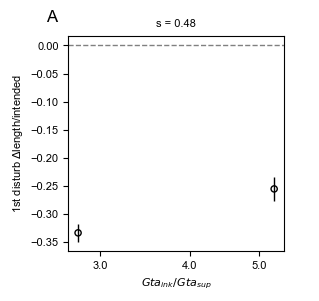

In [25]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_disturb1', Camax=0.65, logy=False, printOut=False, trimVariables=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
1   zdepth           0.48    1.7e-02

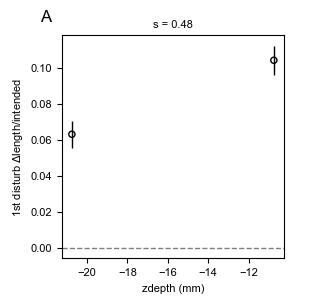

In [218]:
rgt = mp.regressionTableSDT(ms, ms.ss[(ms.ss.int_Ca>15)&(ms.ss.spacing==0.5)], 'delta_hn_disturb1', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dhndt_w1oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dhndt_w1oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dhndt_w1oReg.png and .svg


variable Spearman coeff  \
0                                             spacing           0.00   
1                                    adjusted spacing          -0.08   
2                               $Gta_{ink}/Gta_{sup}$          -0.10   
3                               $tGd_{ink}/tGd_{sup}$          -0.19   
4                                 $Ga_{ink}/Ga_{sup}$          -0.16   
5                                 $Gd_{ink}/Gd_{sup}$          -0.20   
6                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.50   
7               $\tau_{y.ink.desc}/\tau_{y.sup.desc}$          -0.21   
8                                           $\bm{Ca}$    $\bm{0.76}$   
9                                          $Ca_{ink}$           0.51   
10                                    $\bm{Ca_{sup}}$    $\bm{0.76}$   
11                          $Ca_{ink}\times Ca_{sup}$           0.65   
12                                $Ca_{ink}/Ca_{sup}$          -0.17   
13                        $\overline{d_{PR.ink.asc}}$           0.47   
14                   $\bm{\overline{d_{PR.sup.asc}}}$    $\bm{0.75}$   
15  $\overline{d_{PR.ink.asc}}\times \overline{d_{...           0.66   
16  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.50   
17                       $\overline{d_{PR.ink.desc}}$           0.53   
18                  $\bm{\overline{d_{PR.sup.desc}}}$    $\bm{0.81}$   
19  $\overline{d_{PR.ink.desc}}\times \overline{d_...           0.70   
20  $\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...          -0.21   
21                                    $\bm{We_{ink}}$    $\bm{0.51}$   
22                                         $We_{sup}$           0.43   
23                          $We_{ink}\times We_{sup}$           0.46   
24                                $We_{ink}/We_{sup}$          -0.02   
25                                         $Oh_{ink}$           0.43   
26                                    $\bm{Oh_{sup}}$    $\bm{0.82}$   
27                          $Oh_{ink}\times Oh_{sup}$           0.68   
28                                $Oh_{ink}/Oh_{sup}$          -0.17   
29                                         $Re_{ink}$          -0.16   
30                                    $\bm{Re_{sup}}$   $\bm{-0.57}$   
31                          $Re_{ink}\times Re_{sup}$          -0.46   
32                                $Re_{ink}/Re_{sup}$           0.17   
33                                     $Bm_{ink.asc}$          -0.36   
34                                     $Bm_{sup.asc}$          -0.33   
35             $\bm{Bm_{ink.asc}\times Bm_{sup.asc}}$   $\bm{-0.53}$   
36                        $Bm_{ink.asc}/Bm_{sup.asc}$          -0.20   
37                                    $Bm_{ink.desc}$          -0.06   
38                                    $Bm_{sup.desc}$           0.22   
39                $Bm_{ink.desc}\times Bm_{sup.desc}$           0.02   
40                      $Bm_{ink.desc}/Bm_{sup.desc}$          -0.08   
41                                       $\eta_{ink}$           0.16   
42                                  $\bm{\eta_{sup}}$    $\bm{0.57}$   
43                      $\eta_{ink}\times \eta_{sup}$           0.45   
44                            $\eta_{ink}/\eta_{sup}$          -0.17   

         Spearman p  
0           9.8e-01  
1           2.4e-02  
2           3.4e-03  
3           2.9e-08  
4           2.3e-06  
5           3.1e-09  
6           6.1e-56  
7           1.7e-10  
8   $\bm{2.8e-170}$  
9           1.9e-59  
10  $\bm{2.8e-170}$  
11         9.1e-108  
12          1.8e-07  
13          4.4e-49  
14  $\bm{1.4e-160}$  
15         2.5e-110  
16          6.1e-56  
17          2.1e-65  
18  $\bm{2.8e-206}$  
19         1.1e-133  
20          1.7e-10  
21   $\bm{5.0e-59}$  
22          1.9e-41  
23          1.6e-48  
24          6.4e-01  
25          3.1e-41  
26  $\bm{2.6e-216}$  
27         1.7e-119  
28          2.1e-07  
29          2.7e-06  
30   $\bm{3.0e-78}$  
31          1.4e-47  
32    

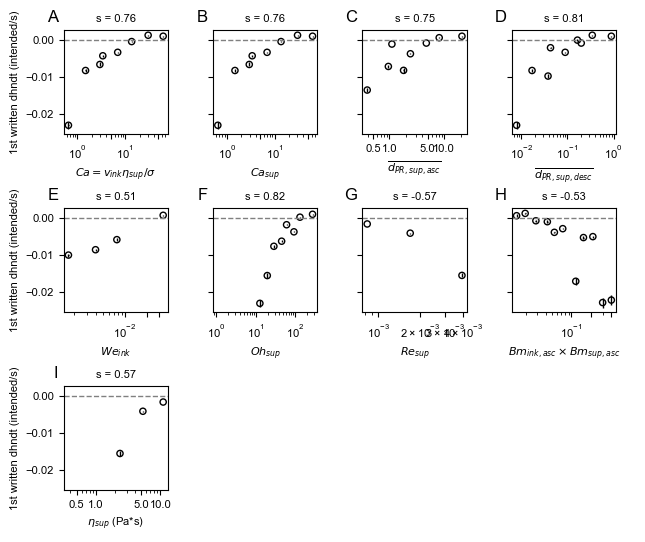

In [9]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dhndt_w1o', logy=False, printOut=False, trimVariables=False, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dhndt_d1oRegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\dhndt_d1oReg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\dhndt_d1oReg.png and .svg


variable Spearman coeff  \
0                                             spacing           0.19   
1                                    adjusted spacing           0.06   
2                               $Gta_{ink}/Gta_{sup}$          -0.06   
3                               $tGd_{ink}/tGd_{sup}$          -0.05   
4                                 $Ga_{ink}/Ga_{sup}$          -0.04   
5                                 $Gd_{ink}/Gd_{sup}$          -0.06   
6                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.36   
7               $\tau_{y.ink.desc}/\tau_{y.sup.desc}$          -0.07   
8                                           $\bm{Ca}$    $\bm{0.54}$   
9                                          $Ca_{ink}$           0.41   
10                                    $\bm{Ca_{sup}}$    $\bm{0.54}$   
11                          $Ca_{ink}\times Ca_{sup}$           0.50   
12                                $Ca_{ink}/Ca_{sup}$          -0.01   
13                        $\overline{d_{PR.ink.asc}}$           0.36   
14                   $\bm{\overline{d_{PR.sup.asc}}}$    $\bm{0.55}$   
15  $\bm{\overline{d_{PR.ink.asc}}\times \overline...    $\bm{0.50}$   
16  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.36   
17                       $\overline{d_{PR.ink.desc}}$           0.42   
18                  $\bm{\overline{d_{PR.sup.desc}}}$    $\bm{0.56}$   
19  $\bm{\overline{d_{PR.ink.desc}}\times \overlin...    $\bm{0.51}$   
20  $\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...          -0.07   
21                                         $We_{ink}$           0.44   
22                                         $We_{sup}$           0.44   
23                          $We_{ink}\times We_{sup}$           0.43   
24                                $We_{ink}/We_{sup}$          -0.15   
25                                         $Oh_{ink}$           0.32   
26                                    $\bm{Oh_{sup}}$    $\bm{0.51}$   
27                          $Oh_{ink}\times Oh_{sup}$           0.47   
28                                $Oh_{ink}/Oh_{sup}$          -0.01   
29                                         $Re_{ink}$          -0.09   
30                                         $Re_{sup}$          -0.23   
31                          $Re_{ink}\times Re_{sup}$          -0.21   
32                                $Re_{ink}/Re_{sup}$           0.01   
33                                     $Bm_{ink.asc}$          -0.38   
34                                     $Bm_{sup.asc}$          -0.06   
35                  $Bm_{ink.asc}\times Bm_{sup.asc}$          -0.41   
36                        $Bm_{ink.asc}/Bm_{sup.asc}$          -0.29   
37                                    $Bm_{ink.desc}$          -0.13   
38                                    $Bm_{sup.desc}$           0.15   
39                $Bm_{ink.desc}\times Bm_{sup.desc}$          -0.04   
40                      $Bm_{ink.desc}/Bm_{sup.desc}$          -0.12   
41                                       $\eta_{ink}$           0.09   
42                                       $\eta_{sup}$           0.23   
43                      $\eta_{ink}\times \eta_{sup}$           0.21   
44                            $\eta_{ink}/\eta_{sup}$          -0.01   

        Spearman p  
0          1.2e-03  
1          3.2e-01  
2          3.0e-01  
3          4.2e-01  
4          4.9e-01  
5          2.9e-01  
6          3.3e-10  
7          2.6e-01  
8   $\bm{7.2e-24}$  
9          1.5e-13  
10  $\bm{7.2e-24}$  
11         1.2e-19  
12         8.6e-01  
13         2.5e-10  
14  $\bm{4.6e-24}$  
15  $\bm{3.9e-20}$  
16         3.3e-10  
17         6.8e-14  
18  $\bm{7.0e-26}$  
19  $\bm{5.6e-21}$  
20         2.6e-01  
21         4.8e-15  
22         3.8e-15  
23         1.6e-14  
24         1.0e-02  
25         3.5e-08  
26  $\bm{6.3e-21}$  
27         2.0e-17  
28         8.6e-01  
29         1.2e-01  
30         7.0e-05  
31         2.5e-04  
32         8.8e-01  
33         1.1e-11

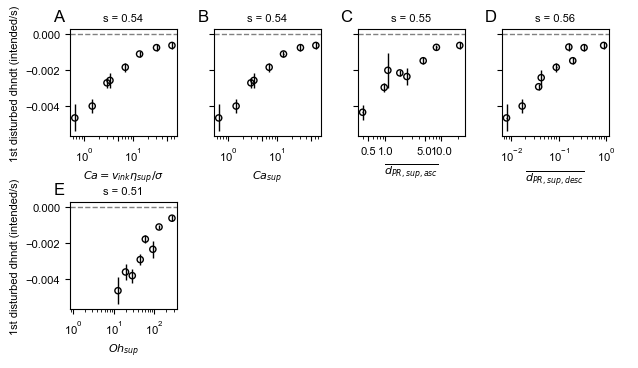

In [10]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dhndt_d1o', logy=False, printOut=False, trimVariables=False, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
2  $\eta_{ink}\times \eta_{sup}$          -0.45    3.6e-06

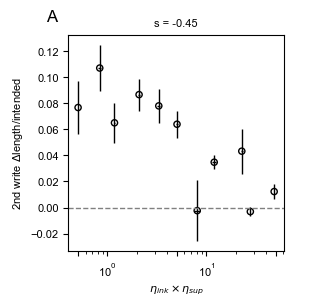

In [19]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_hn_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
1  $We_{sup}$           0.50    2.1e-07

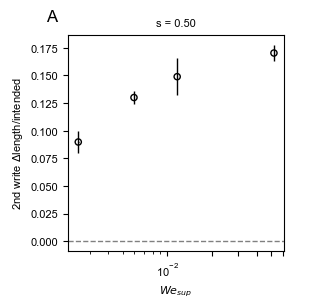

In [20]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_hn_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
2  $\eta_{ink}\times \eta_{sup}$          -0.35    4.1e-04

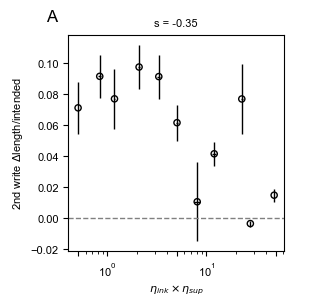

In [21]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'delta_hn_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0      spacing          -0.90    1.0e-13
1  spacing_adj          -0.92    2.6e-15

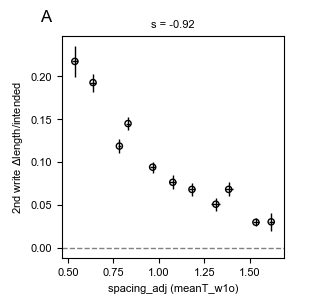

In [22]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca>50], 'delta_hn_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_hn_disturb2RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_hn_disturb2Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_hn_disturb2Reg.png and .svg


variable Spearman coeff  \
0                                             spacing           0.17   
1                                    adjusted spacing           0.03   
2                               $Gta_{ink}/Gta_{sup}$          -0.23   
3                               $tGd_{ink}/tGd_{sup}$          -0.26   
4                                 $Ga_{ink}/Ga_{sup}$          -0.23   
5                                 $Gd_{ink}/Gd_{sup}$          -0.24   
6                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.48   
7               $\tau_{y.ink.desc}/\tau_{y.sup.desc}$          -0.28   
8                                           $\bm{Ca}$    $\bm{0.58}$   
9                                          $Ca_{ink}$           0.36   
10                                    $\bm{Ca_{sup}}$    $\bm{0.58}$   
11                          $Ca_{ink}\times Ca_{sup}$           0.49   
12                                $Ca_{ink}/Ca_{sup}$          -0.17   
13                        $\overline{d_{PR.ink.asc}}$           0.30   
14                   $\bm{\overline{d_{PR.sup.asc}}}$    $\bm{0.57}$   
15  $\overline{d_{PR.ink.asc}}\times \overline{d_{...           0.50   
16  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.48   
17                       $\overline{d_{PR.ink.desc}}$           0.36   
18                  $\bm{\overline{d_{PR.sup.desc}}}$    $\bm{0.60}$   
19  $\overline{d_{PR.ink.desc}}\times \overline{d_...           0.50   
20  $\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...          -0.28   
21                                         $We_{ink}$           0.46   
22                                         $We_{sup}$           0.41   
23                          $We_{ink}\times We_{sup}$           0.44   
24                                $We_{ink}/We_{sup}$          -0.07   
25                                         $Oh_{ink}$           0.26   
26                                    $\bm{Oh_{sup}}$    $\bm{0.57}$   
27                          $Oh_{ink}\times Oh_{sup}$           0.45   
28                                $Oh_{ink}/Oh_{sup}$          -0.17   
29                                         $Re_{ink}$           0.02   
30                                         $Re_{sup}$          -0.35   
31                          $Re_{ink}\times Re_{sup}$          -0.19   
32                                $Re_{ink}/Re_{sup}$           0.17   
33                                     $Bm_{ink.asc}$          -0.32   
34                                     $Bm_{sup.asc}$          -0.18   
35                  $Bm_{ink.asc}\times Bm_{sup.asc}$          -0.41   
36                        $Bm_{ink.asc}/Bm_{sup.asc}$          -0.23   
37                                    $Bm_{ink.desc}$          -0.08   
38                                    $Bm_{sup.desc}$           0.16   
39                $Bm_{ink.desc}\times Bm_{sup.desc}$          -0.03   
40                      $Bm_{ink.desc}/Bm_{sup.desc}$          -0.10   
41                                       $\eta_{ink}$          -0.02   
42                                       $\eta_{sup}$           0.35   
43                      $\eta_{ink}\times \eta_{sup}$           0.18   
44                            $\eta_{ink}/\eta_{sup}$          -0.17   

        Spearman p  
0          2.7e-03  
1          6.4e-01  
2          8.6e-05  
3          7.8e-06  
4          5.1e-05  
5          2.2e-05  
6          4.8e-18  
7          1.5e-06  
8   $\bm{7.8e-28}$  
9          1.4e-10  
10  $\bm{7.8e-28}$  
11         2.6e-19  
12         4.1e-03  
13         1.2e-07  
14  $\bm{6.0e-27}$  
15         6.7e-20  
16         4.8e-18  
17         3.7e-10  
18  $\bm{4.0e-30}$  
19         8.9e-20  
20         1.5e-06  
21         3.8e-17  
22         2.2e-13  
23         2.1e-15  
24         2.6e-01  
25         4.8e-06  
26  $\bm{4.0e-27}$  
27         3.8e-16  
28         4.2e-03  
29         7.9e-01  
30         7.3e-10  
31         9.8e-04  
32         4.4e-03  
33         1.4e-08

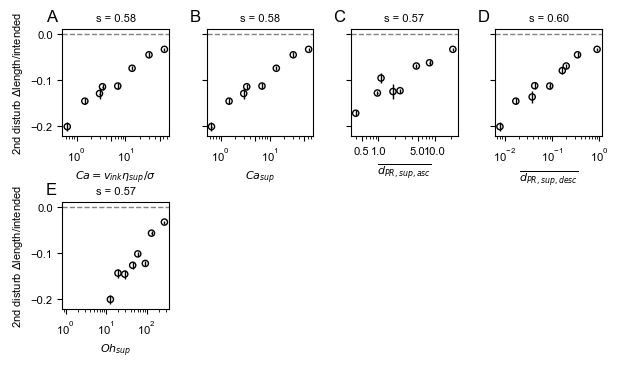

In [11]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_disturb2', logy=False, printOut=False, trimVariables=False, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_hn_disturb2_Camax1_RegImport.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\regressionTables\delta_hn_disturb2_Camax1_Reg.tex
INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\plots\delta_hn_disturb2_Camax1_Reg.png and .svg


variable Spearman coeff  \
0                                      $\bm{spacing}$    $\bm{0.56}$   
1                             $\bm{adjusted spacing}$    $\bm{0.58}$   
2                               $Gta_{ink}/Gta_{sup}$          -0.21   
3                               $tGd_{ink}/tGd_{sup}$          -0.16   
4                                 $Ga_{ink}/Ga_{sup}$          -0.21   
5                                 $Gd_{ink}/Gd_{sup}$          -0.21   
6                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.21   
7               $\tau_{y.ink.desc}/\tau_{y.sup.desc}$          -0.16   
8                                                $Ca$           0.06   
9                                          $Ca_{ink}$          -0.21   
10                                         $Ca_{sup}$           0.06   
11                          $Ca_{ink}\times Ca_{sup}$          -0.21   
12                                $Ca_{ink}/Ca_{sup}$          -0.21   
13                        $\overline{d_{PR.ink.asc}}$          -0.21   
14                        $\overline{d_{PR.sup.asc}}$           0.06   
15  $\overline{d_{PR.ink.asc}}\times \overline{d_{...          -0.21   
16  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.21   
17                       $\overline{d_{PR.ink.desc}}$          -0.16   
18                       $\overline{d_{PR.sup.desc}}$           0.06   
19  $\overline{d_{PR.ink.desc}}\times \overline{d_...          -0.03   
20  $\overline{d_{PR.ink.desc}}/\overline{d_{PR.su...          -0.16   
21                                         $We_{ink}$           0.07   
22                                         $We_{sup}$           0.06   
23                          $We_{ink}\times We_{sup}$           0.07   
24                                $We_{ink}/We_{sup}$          -0.01   
25                                         $Oh_{ink}$          -0.21   
26                                         $Oh_{sup}$           0.06   
27                          $Oh_{ink}\times Oh_{sup}$          -0.21   
28                                $Oh_{ink}/Oh_{sup}$          -0.21   
29                                         $Re_{ink}$           0.21   
30                          $Re_{ink}\times Re_{sup}$           0.21   
31                                $Re_{ink}/Re_{sup}$           0.21   
32                                     $Bm_{ink.asc}$           0.12   
33                  $Bm_{ink.asc}\times Bm_{sup.asc}$           0.12   
34                        $Bm_{ink.asc}/Bm_{sup.asc}$           0.12   
35                                    $Bm_{ink.desc}$           0.12   
36                $Bm_{ink.desc}\times Bm_{sup.desc}$           0.12   
37                      $Bm_{ink.desc}/Bm_{sup.desc}$           0.12   
38                                       $\eta_{ink}$          -0.21   
39                      $\eta_{ink}\times \eta_{sup}$          -0.21   
40                            $\eta_{ink}/\eta_{sup}$          -0.21   

        Spearman p  
0   $\bm{1.3e-04}$  
1   $\bm{5.8e-05}$  
2          1.9e-01  
3          3.3e-01  
4          1.9e-01  
5          1.9e-01  
6          1.9e-01  
7          3.3e-01  
8          7.0e-01  
9          1.9e-01  
10         7.0e-01  
11         1.9e-01  
12         1.9e-01  
13         1.9e-01  
14         7.0e-01  
15         1.9e-01  
16         1.9e-01  
17         3.3e-01  
18         7.0e-01  
19         8.3e-01  
20         3.3e-01  
21         6.6e-01  
22         7.0e-01  
23         6.6e-01  
24         9.5e-01  
25         1.9e-01  
26         7.0e-01  
27         1.9e-01  
28         1.9e-01  
29         1.9e-01  
30         1.9e-01  
31         1.9e-01  
32         4.7e-01  
33         4.7e-01  
34         4.7e-01  
35         4.7e-01  
36         4.7e-01  
37         4.7e-01  
38         1.9e-01  
39         1.9e-01  
40         1.9e-01

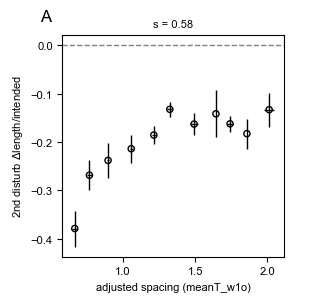

In [14]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_disturb2', Camax=1, logy=False, printOut=False, trimVariables=False, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0   zdepth           0.80    4.1e-07

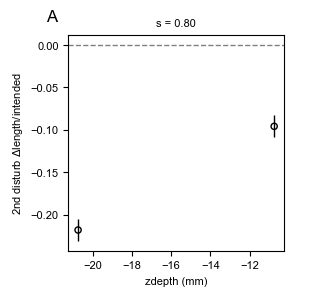

In [183]:
rgt = mp.regressionTableSDT(ms, ms.ss[(ms.ss.int_Ca<1)], 'delta_hn_disturb2', spacing=1.25, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
6                $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.29    3.7e-07
3  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.29    3.7e-07

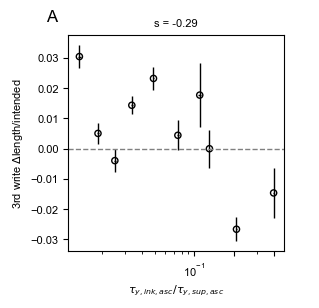

In [30]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_hn_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0                    spacing_adj          -0.59    6.3e-08
1                     $We_{sup}$           0.51    6.0e-06
2      $Re_{ink}\times Re_{sup}$           0.57    1.3e-07
3                $Bm_{ink.desc}$           0.71    3.5e-12
4  $Bm_{ink.desc}/Bm_{sup.desc}$           0.70    9.1e-12
5  $\eta_{ink}\times \eta_{sup}$          -0.57    1.3e-07

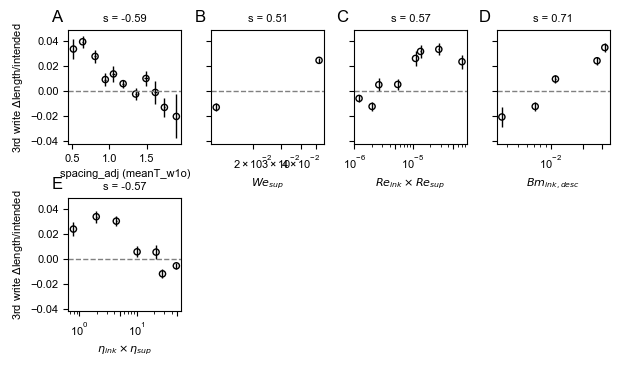

In [28]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca>10], 'delta_hn_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## ldiff

variable Spearman coeff Spearman p
0                               $Ca$          -0.65    1.4e-73
1                         $Ca_{sup}$          -0.65    1.4e-73
2        $\overline{d_{PR.sup.asc}}$          -0.66    1.6e-76
3       $\overline{d_{PR.sup.desc}}$          -0.69    1.8e-85
4                         $Oh_{sup}$          -0.71    2.8e-92
5                         $Re_{sup}$           0.52    2.3e-42
6          $Re_{ink}\times Re_{sup}$           0.50    3.6e-39
7  $Bm_{ink.asc}\times Bm_{sup.asc}$           0.52    3.8e-42
8                       $\eta_{sup}$          -0.52    2.3e-42

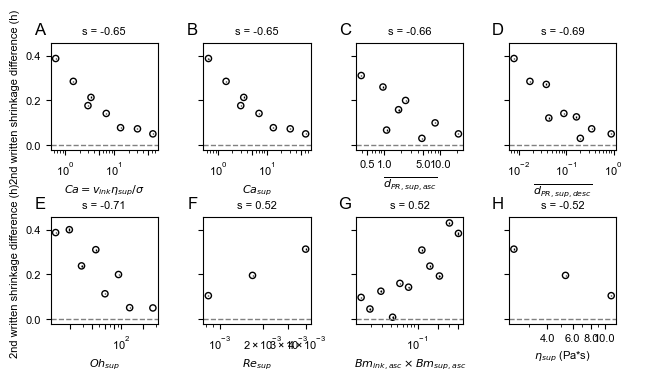

In [40]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0        $Ca$           0.43    6.2e-15
2  $Ca_{sup}$           0.43    6.2e-15

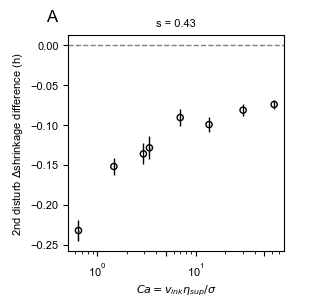

In [41]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_ldiff_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0                          $Ca$          -0.57    4.6e-27
1                    $Ca_{sup}$          -0.57    4.6e-27
2   $\overline{d_{PR.sup.asc}}$          -0.59    7.1e-30
3  $\overline{d_{PR.sup.desc}}$          -0.61    7.6e-32
4                    $Oh_{sup}$          -0.63    2.4e-34

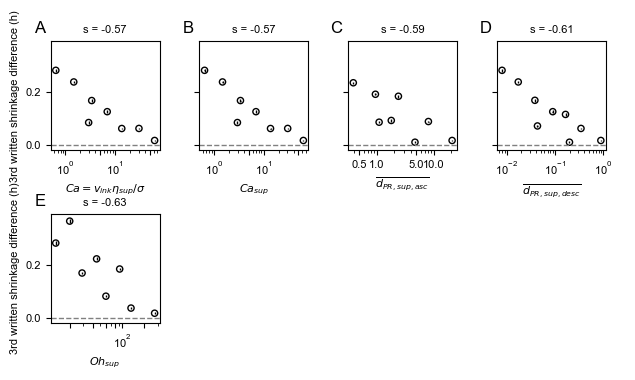

In [43]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w3o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
1  $Oh_{sup}$           0.24    2.3e-05

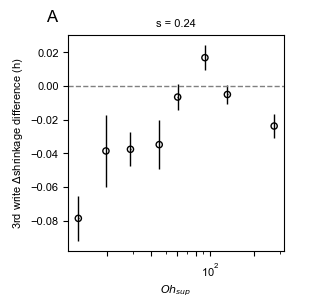

In [44]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_ldiff_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## meanT

variable Spearman coeff Spearman p
0    $Oh_{sup}$          -0.57    3.8e-26
1    $Re_{sup}$           0.55    5.4e-24
2  $\eta_{sup}$          -0.55    5.4e-24

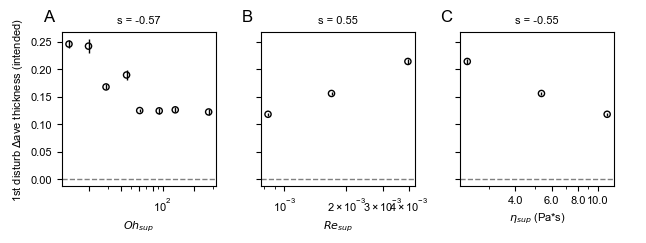

In [46]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb1', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## emptiness

variable Spearman coeff Spearman p
0                $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.57    1.8e-51
1  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.57    1.8e-51

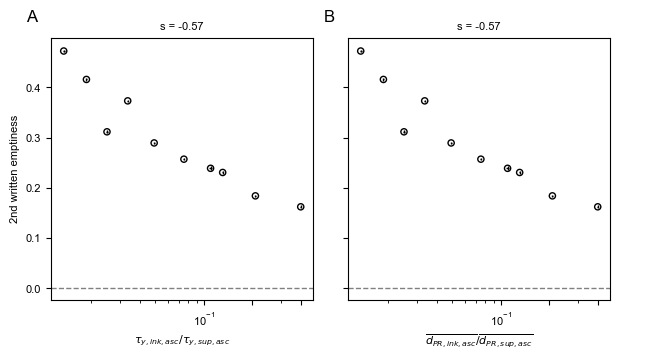

In [48]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0                $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.72    9.0e-17
1                                $Ca_{ink}/Ca_{sup}$          -0.56    2.4e-09
2  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.72    9.0e-17
3                       $\overline{d_{PR.sup.desc}}$           0.53    1.9e-08
4                                         $Oh_{sup}$           0.59    1.5e-10
5                                $Oh_{ink}/Oh_{sup}$          -0.55    2.7e-09
6                                         $Re_{sup}$          -0.55    3.0e-09
7                                $Re_{ink}/Re_{sup}$           0.55    3.1e-09
8                                       $\eta_{sup}$           0.55    3.0e-09
9                            $\eta_{ink}/\eta_{sup}$          -0.56    2.4e-09

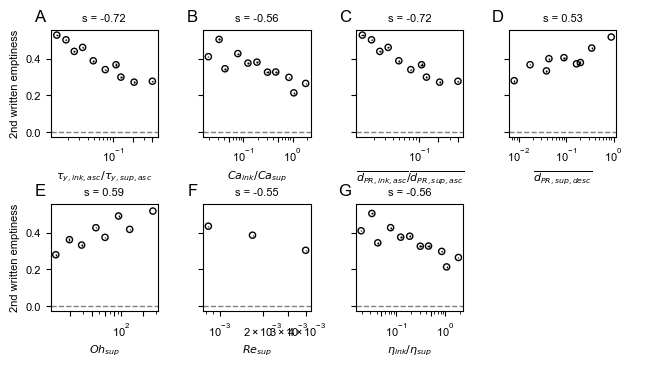

In [51]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'emptiness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing_adj           0.66    2.2e-12

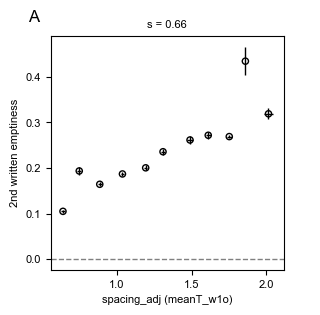

In [52]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'emptiness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0      spacing           0.58    6.3e-54
1  spacing_adj           0.57    4.4e-53

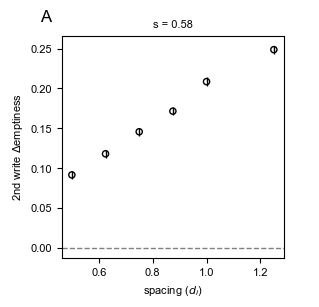

In [54]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_emptiness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0                $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.58    2.7e-10
1  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.58    2.7e-10

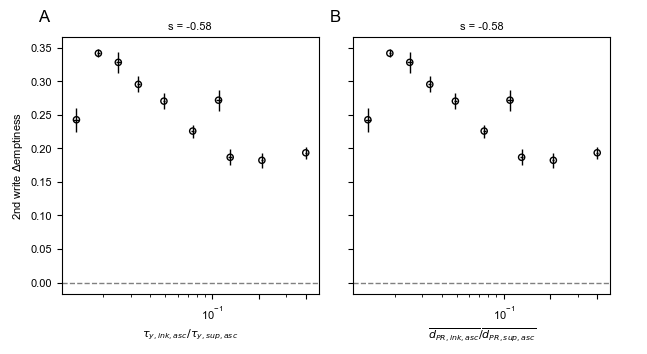

In [55]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0      spacing           0.56    1.6e-08
1  spacing_adj           0.54    5.0e-08

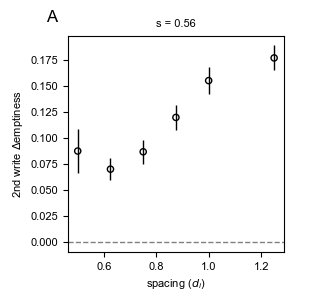

In [56]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_emptiness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
2  $\overline{d_{PR.ink.desc}}\times \overline{d_...          -0.37    9.9e-03

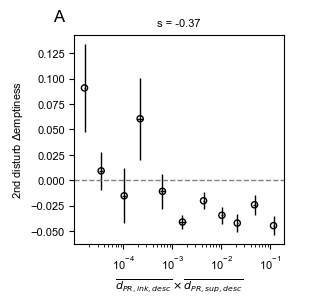

In [57]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0      spacing           0.58    5.0e-05
1  spacing_adj           0.63    6.4e-06

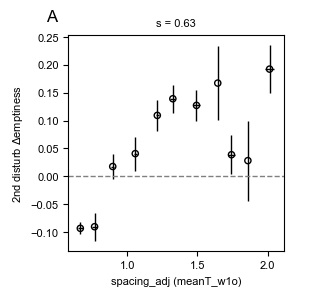

In [58]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_emptiness_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  $\overline{d_{PR.ink.desc}}$          -0.45    9.9e-04

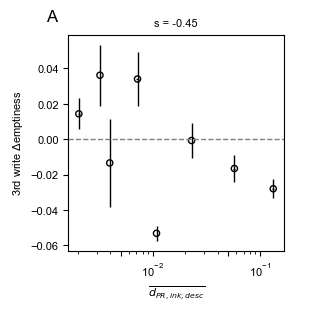

In [77]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
1  spacing_adj           0.45    1.5e-03

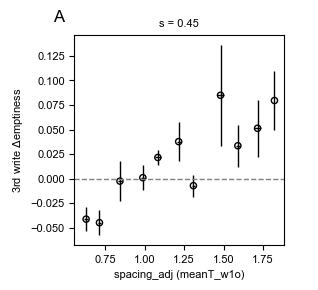

In [78]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_emptiness_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## roughness

variable Spearman coeff Spearman p
0      spacing           0.64    2.1e-70
1  spacing_adj           0.65    6.2e-73

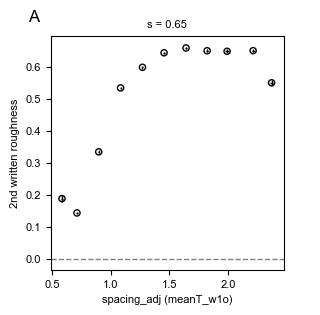

In [94]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [4]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'roughness_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  $\overline{d_{PR.sup.desc}}$           0.51    5.6e-08
1                    $Oh_{sup}$           0.63    3.0e-12
2                    $Re_{sup}$          -0.68    1.0e-14
3                  $\eta_{sup}$           0.68    1.0e-14

variable Spearman coeff Spearman p
0                                $Gd_{ink}/Gd_{sup}$          -0.65    3.2e-13
1                $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.72    5.8e-17
2                                $Ca_{ink}/Ca_{sup}$          -0.61    2.1e-11
3  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.72    5.8e-17
4                                $Oh_{ink}/Oh_{sup}$          -0.61    2.6e-11
5                                $Re_{ink}/Re_{sup}$           0.61    3.5e-11
6                            $\eta_{ink}/\eta_{sup}$          -0.61    2.1e-11

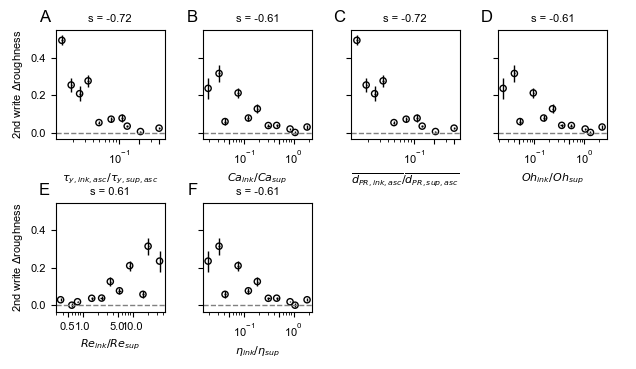

In [97]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_roughness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0      spacing           0.65    1.4e-72
1  spacing_adj           0.66    1.1e-76

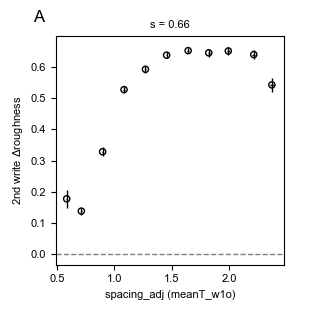

In [98]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0                                               $Ca$           0.61    3.2e-21
1                                         $Ca_{sup}$           0.61    3.2e-21
2                          $Ca_{ink}\times Ca_{sup}$           0.58    2.3e-19
3                        $\overline{d_{PR.sup.asc}}$           0.65    1.3e-24
4  $\overline{d_{PR.ink.asc}}\times \overline{d_{...           0.61    1.8e-21
5                       $\overline{d_{PR.sup.desc}}$           0.65    5.2e-25
6  $\overline{d_{PR.ink.desc}}\times \overline{d_...           0.63    1.1e-22
7                                         $Oh_{sup}$           0.61    1.9e-21
8                          $Oh_{ink}\times Oh_{sup}$           0.60    2.5e-20

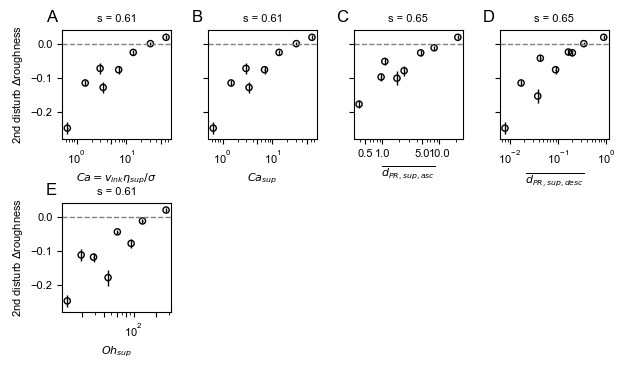

In [108]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing>0.625], 'delta_roughness_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
1  spacing_adj          -0.47    1.5e-03

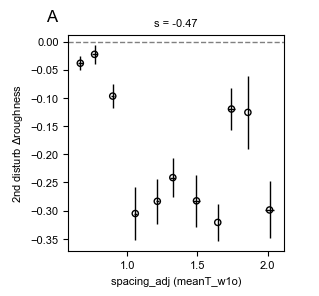

In [109]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_roughness_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0      spacing           0.80    3.8e-67
1  spacing_adj           0.80    4.0e-67

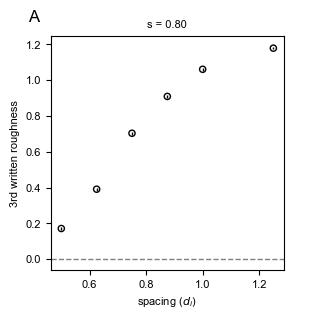

In [110]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w3o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
1    $Re_{sup}$          -0.46    8.2e-04
1  $\eta_{sup}$           0.46    8.2e-04

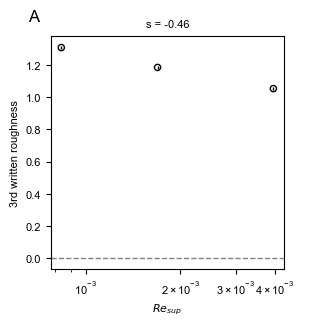

In [112]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'roughness_w3o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0                $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.64    7.3e-07
1                                $Ca_{ink}/Ca_{sup}$          -0.51    1.8e-04
2  $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.64    7.3e-07
3                                $Oh_{ink}/Oh_{sup}$          -0.51    1.9e-04
4                                $Re_{ink}/Re_{sup}$           0.50    2.2e-04
5                            $\eta_{ink}/\eta_{sup}$          -0.51    1.8e-04

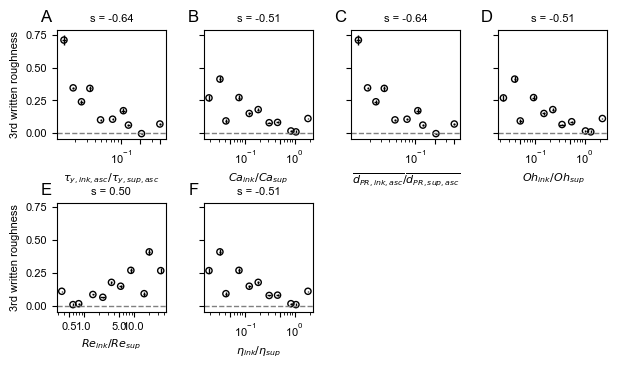

In [113]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'roughness_w3o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0      spacing           0.76    3.5e-58
1  spacing_adj           0.74    4.6e-54

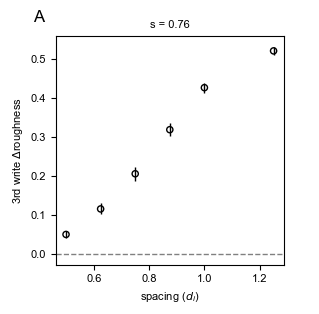

In [114]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
2  $\eta_{ink}\times \eta_{sup}$          -0.36    1.0e-02

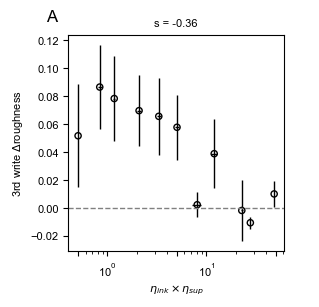

In [116]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'delta_roughness_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## segments

variable Spearman coeff Spearman p
0      spacing           0.74   3.8e-102
1  spacing_adj           0.77   1.9e-116

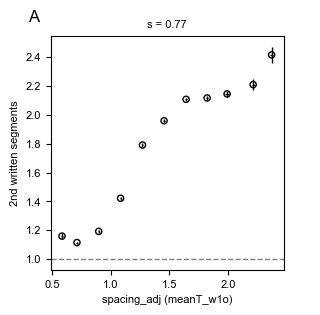

In [122]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [7]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', spacing=0.875, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  adjusted spacing           0.37    1.7e-04

variable Spearman coeff Spearman p
0      spacing           0.75   6.9e-109
1  spacing_adj           0.78   3.8e-123

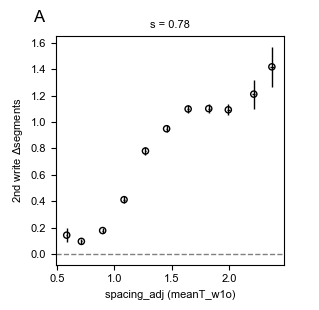

In [124]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_segments_write2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff  \
0                                         spacing_adj           0.53   
1                                          $Ca_{ink}$          -0.58   
2                           $Ca_{ink}\times Ca_{sup}$          -0.58   
3                         $\overline{d_{PR.ink.asc}}$          -0.58   
4   $\overline{d_{PR.ink.asc}}\times \overline{d_{...          -0.62   
5                        $\overline{d_{PR.ink.desc}}$          -0.54   
6                        $\overline{d_{PR.sup.desc}}$          -0.53   
7   $\overline{d_{PR.ink.desc}}\times \overline{d_...          -0.57   
8                                          $We_{sup}$          -0.52   
9                           $We_{ink}\times We_{sup}$          -0.50   
10                          $Oh_{ink}\times Oh_{sup}$          -0.59   

   Spearman p  
0     1.1e-04  
1     1.5e-05  
2     1.0e-05  
3     1.1e-05  
4     1.8e-06  
5     6.9e-05  
6     8.9e-05  
7     2.3e-05  
8     1.1e-04  
9     2.2e-04  
10    6.8e-06

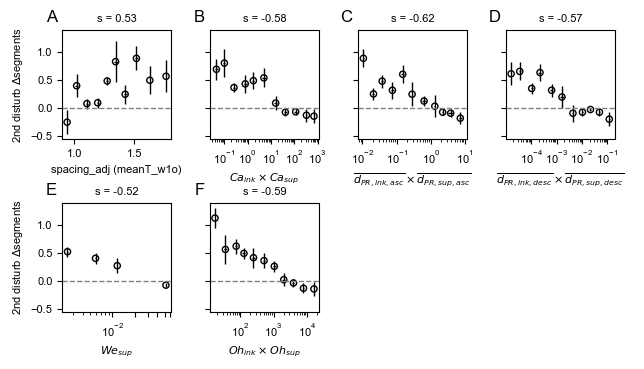

In [128]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'delta_segments_disturb2', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing_adj           0.52    1.8e-04

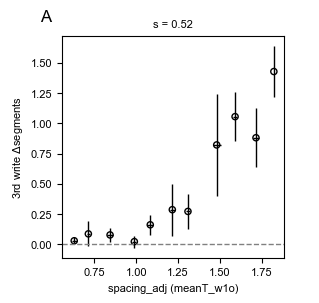

In [131]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_segments_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing_adj           0.41    3.5e-03

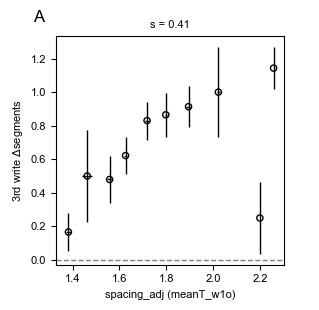

In [133]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_segments_write3', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## space_at

variable Spearman coeff  \
0                                 $Ga_{ink}/Ga_{sup}$          -0.66   
1                                 $Gd_{ink}/Gd_{sup}$          -0.68   
2                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.69   
3                                 $Ca_{ink}/Ca_{sup}$          -0.71   
4   $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.69   
5                                 $Oh_{ink}/Oh_{sup}$          -0.71   
6                                 $Re_{ink}/Re_{sup}$           0.70   
7                                     $Bm_{ink.desc}$           0.61   
8                 $Bm_{ink.desc}\times Bm_{sup.desc}$           0.65   
9                       $Bm_{ink.desc}/Bm_{sup.desc}$           0.61   
10                            $\eta_{ink}/\eta_{sup}$          -0.71   

   Spearman p  
0     7.1e-14  
1     6.7e-15  
2     5.2e-15  
3     1.9e-16  
4     5.2e-15  
5     2.6e-16  
6     3.8e-16  
7     1.9e-11  
8     2.0e-13  
9     3.2e-11  
10    1.9e-16

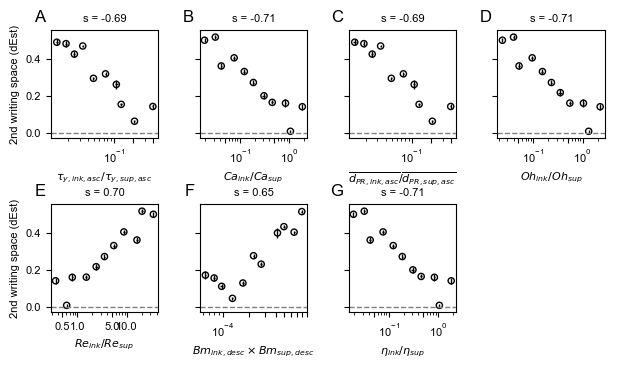

In [136]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'space_at_w2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing           0.51    2.2e-41

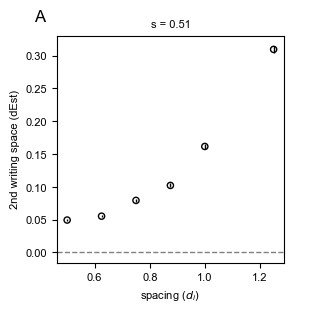

In [139]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_w2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing           0.52    1.2e-21

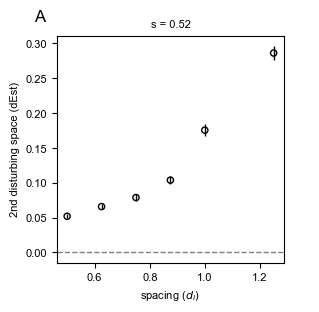

In [140]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_d2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff  \
0                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.64   
1                                 $Ca_{ink}/Ca_{sup}$          -0.55   
2   $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.64   
3                                 $Oh_{ink}/Oh_{sup}$          -0.54   
4                                          $Re_{ink}$           0.55   
5                                 $Re_{ink}/Re_{sup}$           0.54   
6                                     $Bm_{ink.desc}$           0.53   
7                 $Bm_{ink.desc}\times Bm_{sup.desc}$           0.57   
8                       $Bm_{ink.desc}/Bm_{sup.desc}$           0.54   
9                                        $\eta_{ink}$          -0.55   
10                            $\eta_{ink}/\eta_{sup}$          -0.55   

   Spearman p  
0     8.9e-07  
1     4.7e-05  
2     8.9e-07  
3     5.2e-05  
4     4.5e-05  
5     5.8e-05  
6     7.6e-05  
7     2.1e-05  
8     6.2e-05  
9     4.5e-05  
10    4.7e-05

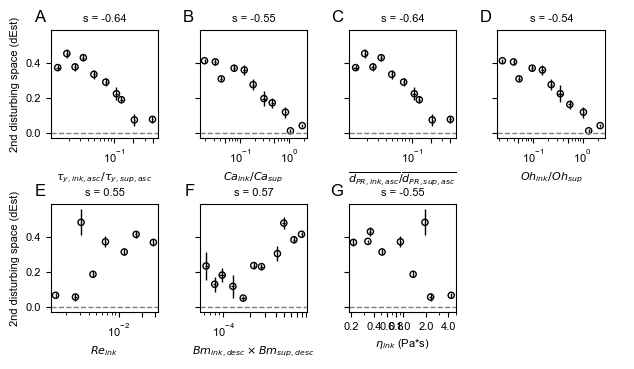

In [141]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'space_at_d2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing           0.51    2.2e-41

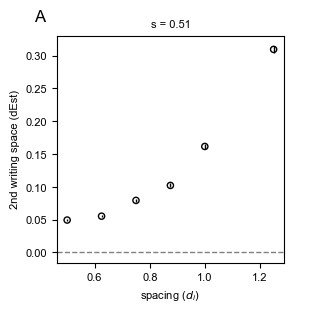

In [142]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_w2p', logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff  \
0                               $Gta_{ink}/Gta_{sup}$          -0.54   
1                                 $Ga_{ink}/Ga_{sup}$          -0.55   
2                                 $Gd_{ink}/Gd_{sup}$          -0.54   
3                 $\tau_{y.ink.asc}/\tau_{y.sup.asc}$          -0.59   
4                                 $Ca_{ink}/Ca_{sup}$          -0.54   
5   $\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...          -0.59   
6                                 $Oh_{ink}/Oh_{sup}$          -0.54   
7                                          $Re_{ink}$           0.56   
8                                 $Re_{ink}/Re_{sup}$           0.54   
9                 $Bm_{ink.desc}\times Bm_{sup.desc}$           0.53   
10                      $Bm_{ink.desc}/Bm_{sup.desc}$           0.50   
11                                       $\eta_{ink}$          -0.56   
12                            $\eta_{ink}/\eta_{sup}$          -0.54   

   Spearman p  
0     5.6e-05  
1     3.5e-05  
2     4.9e-05  
3     5.7e-06  
4     4.5e-05  
5     5.7e-06  
6     4.7e-05  
7     2.4e-05  
8     5.1e-05  
9     7.3e-05  
10    1.9e-04  
11    2.4e-05  
12    4.5e-05

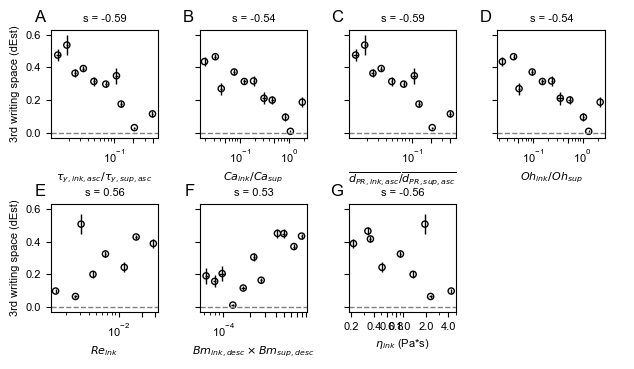

In [145]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_w3p', spacing=1.25, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing           0.48    9.8e-19

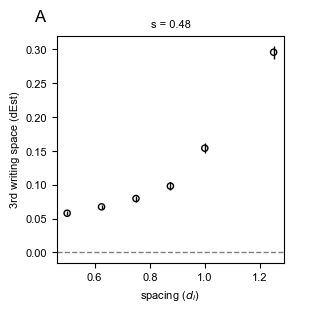

In [146]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_at_w3p',logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## x0

variable Spearman coeff Spearman p
0    $Re_{sup}$          -0.65    3.4e-07
1  $\eta_{sup}$           0.65    3.4e-07

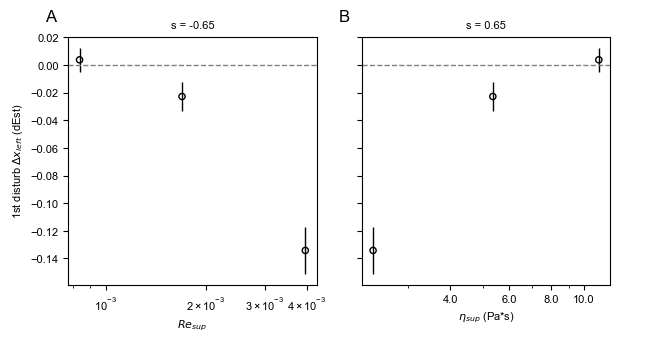

In [156]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_disturb1', spacing=0.5, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing           0.80    3.3e-09

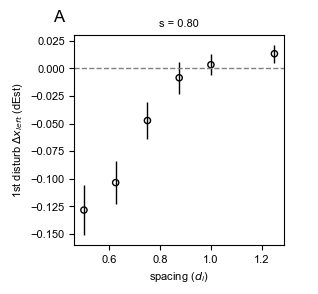

In [157]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_x0_disturb1',  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [7]:
rgt = mp.regressionTableSDT(ms, ms.ss,'delta_x0_disturb1',  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing           0.26    5.9e-06

variable Spearman coeff Spearman p
0      spacing           0.75    4.5e-17
1  spacing_adj           0.71    4.3e-15

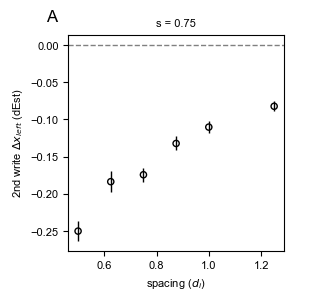

In [160]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_x0_write2',  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
1    $Re_{sup}$          -0.45    2.8e-06
1  $\eta_{sup}$           0.45    2.8e-06

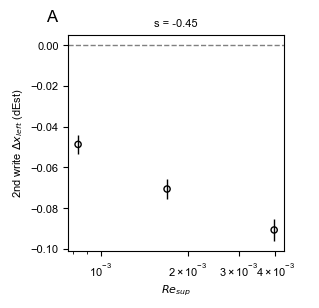

In [163]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_write2', spacing=1.250, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0                          $Ca$           0.51    8.0e-08
1                    $Ca_{sup}$           0.51    8.0e-08
2  $\overline{d_{PR.sup.desc}}$           0.54    1.2e-08
3                    $Oh_{sup}$           0.63    3.4e-12
4                    $Re_{sup}$          -0.58    2.6e-10
5                  $\eta_{sup}$           0.58    2.6e-10

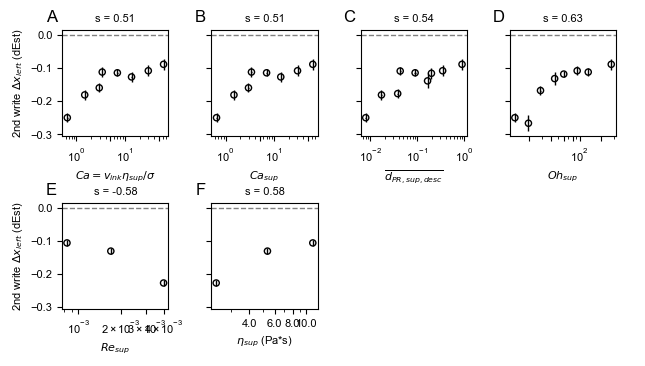

In [162]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_write2', spacing=0.5, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
0    $Re_{sup}$           0.52    1.1e-04
1  $\eta_{sup}$          -0.52    1.1e-04

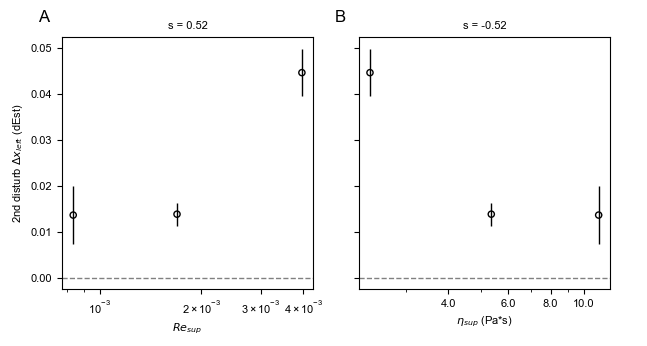

In [168]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_disturb2', spacing=0.875, logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

In [11]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_disturb2', spacing=0.5,logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

variable Spearman coeff Spearman p
3  $Bm_{ink.asc}/Bm_{sup.asc}$           0.49    3.9e-04

variable Spearman coeff Spearman p
0  spacing           0.58    1.4e-28

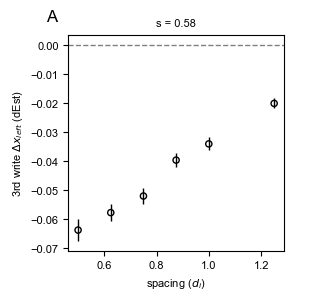

In [170]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_x0_write3',  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
#rgt.xvl.fig

## xf

variable Spearman coeff Spearman p
0           spacing           0.72    9.8e-08
1  adjusted spacing           0.68    6.7e-07

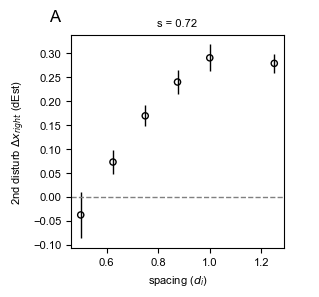

In [16]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_xf_disturb2', Camax=1,  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

variable Spearman coeff Spearman p
0  spacing           0.69    2.7e-06

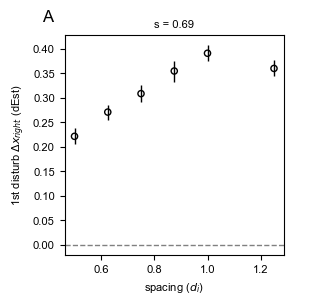

In [17]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_xf_disturb1', Camax=1,  logy=False, printOut=False, trimVariables=True, package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig